<a href="https://colab.research.google.com/github/subhashreegre/McDonaldmarketsegmentanalysis/blob/main/mcdonald.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import bioinfokit as bio
import seaborn as sns

In [2]:
pip install bioinfokit

In [3]:
import bioinfokit as bio

In [4]:
dataset = pd.read_csv("mcdonalds.csv")
dataset

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,4,41,Every three months,Male


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   int64 
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(2), object(13)
memory usage: 170.4+ KB


In [6]:
dataset.mean(numeric_only = True)

Like     0.777013
Age     44.604955
dtype: float64

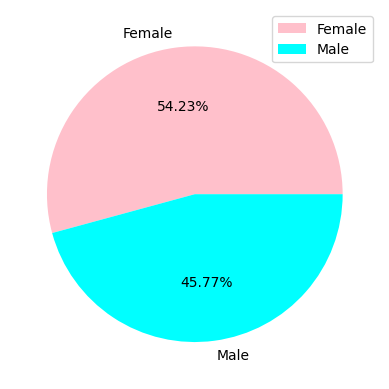

In [7]:
Gender = ["Female", "Male"]
Color = ["pink", "cyan"]
Size = dataset["Gender"].value_counts()
plt.pie(Size, labels=Gender, colors=Color, autopct="%.2f%%")
plt.legend()
plt.show()

<ipython-input-8-fafc748e36d8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  f = sns.countplot(x = dataset["Age"], palette='hsv')


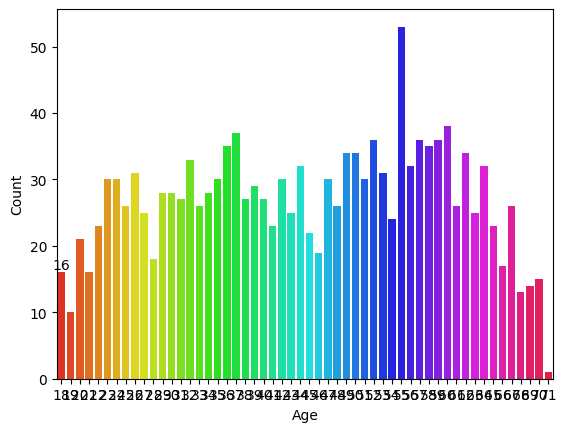

In [8]:
f = sns.countplot(x = dataset["Age"], palette='hsv')
f.bar_label(f.containers[0])
plt.rcParams['figure.figsize'] = (30, 8)
plt.xlabel("Age", size = 10)
plt.ylabel("Count", size = 10)
plt.show()

In [9]:
dataset["Like"]=dataset["Like"].replace({'I hate it!-5': '-5', 'I love it!+5':'+5'})
dataset.dtypes

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like               int64
Age                int64
VisitFrequency    object
Gender            object
dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cols=["yummy", "convenient", "spicy", "fattening", "greasy", "fast", "cheap", "tasty", "expensive", "healthy", "disgusting"]

for i in cols:
    dataset[i]=le.fit_transform(dataset[i])

In [11]:
dataset

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,Every three months,Male


array([[<Axes: title={'center': 'yummy'}>,
        <Axes: title={'center': 'convenient'}>,
        <Axes: title={'center': 'spicy'}>,
        <Axes: title={'center': 'fattening'}>],
       [<Axes: title={'center': 'greasy'}>,
        <Axes: title={'center': 'fast'}>,
        <Axes: title={'center': 'cheap'}>,
        <Axes: title={'center': 'tasty'}>],
       [<Axes: title={'center': 'expensive'}>,
        <Axes: title={'center': 'healthy'}>,
        <Axes: title={'center': 'disgusting'}>,
        <Axes: title={'center': 'Like'}>],
       [<Axes: title={'center': 'Age'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

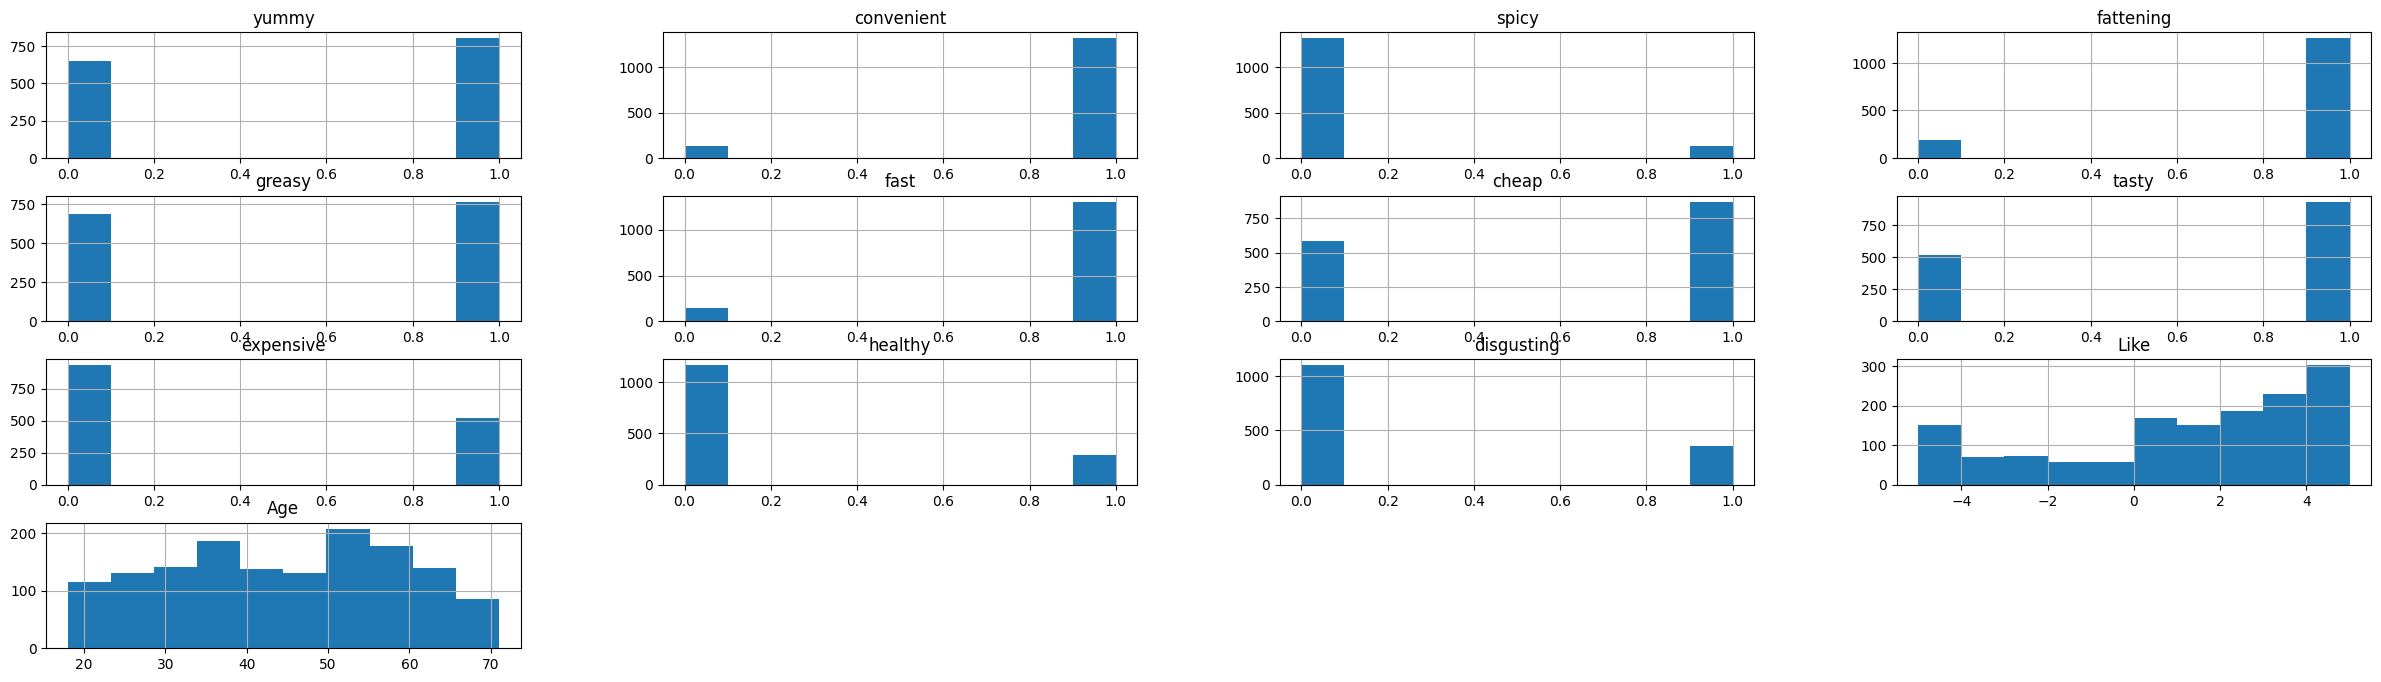

In [12]:
dataset.hist()

In [13]:
x = dataset.loc[:, cols]
x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [14]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

pca_data = preprocessing.scale(x)

pca = PCA(n_components=11)
pc = pca.fit_transform(x)
names=["pc1", "pc2", "pc3", "pc4", "pc5", "pc6", "pc7", "pc8", "pc9", "pc10", "pc11"]
pf = pd.DataFrame(data=pc, columns=names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [15]:
std_dev = []
for i in names:
    std_dev.append(np.std(pf[i]))

print("Standard Deviation")
np.array(std_dev)

Standard Deviation


array([0.75678896, 0.60724649, 0.50444578, 0.39866134, 0.33728888,
       0.31016782, 0.28959761, 0.27502727, 0.2651598 , 0.24875617,
       0.23682131])

In [16]:
pov = pca.explained_variance_ratio_
print("Proportion of Variance")
pov

Proportion of Variance


array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [17]:
cp = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Proportion")
cp

Cumulative Proportion


array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

In [18]:
components = pca.components_
num_pc = pca.n_features_in_
pc_name = ["PC"+str(i) for i in range(1, num_pc+1)]
loadings_df = pd.DataFrame

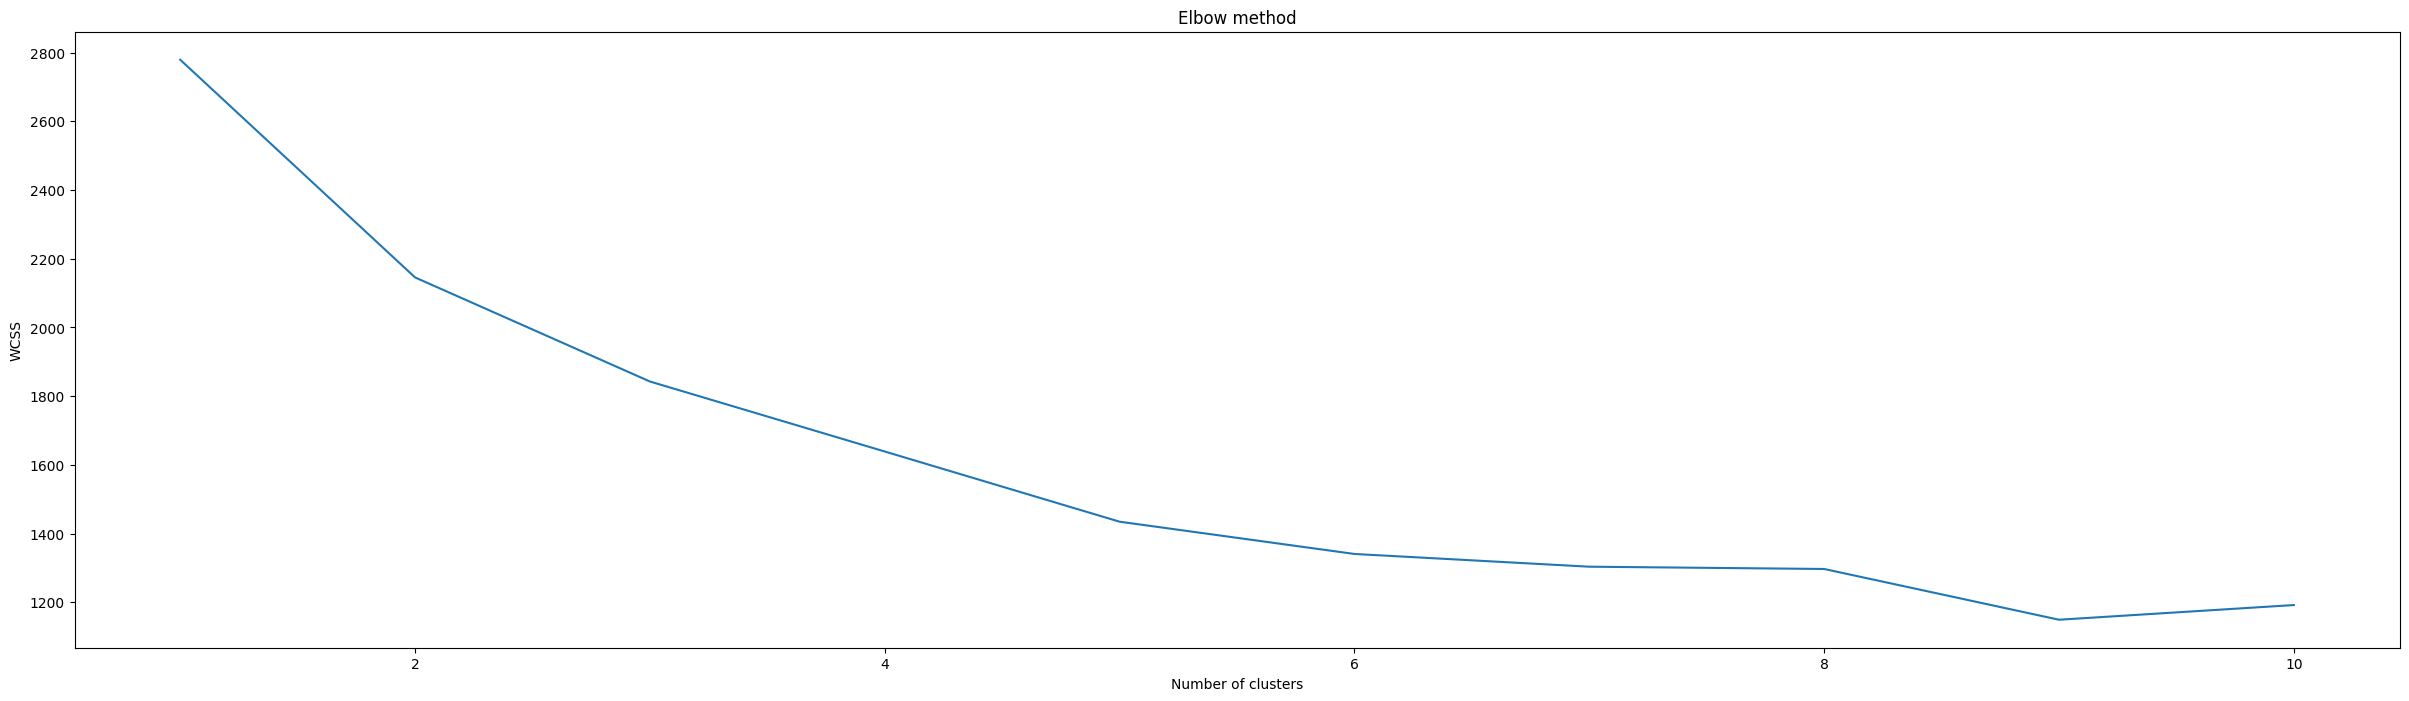

In [19]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init='auto')
    kmeans.fit(pf)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [20]:
#K-means clustering

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0, n_init = 'auto').fit(x)
dataset['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares.
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.

[0 3 3 ... 3 2 1]
1693.8495984032186
6
[[0.08219178 0.8630137  0.06392694 0.76712329 0.21461187 0.85388128
  0.32876712 0.06392694 0.43835616 0.12328767 0.15525114]
 [0.00655738 0.73770492 0.0852459  0.98688525 0.92786885 0.83606557
  0.63278689 0.06885246 0.37704918 0.03934426 0.79016393]
 [0.85690516 0.98003328 0.08985025 0.81364393 0.37603993 0.96505824
  0.95008319 0.97670549 0.01663894 0.30282862 0.04159734]
 [0.81707317 0.96341463 0.12804878 0.92073171 0.63719512 0.87195122
  0.10365854 0.95731707 0.91158537 0.20731707 0.16158537]]


In [21]:
from collections import Counter
Counter(kmeans.labels_)

Counter({0: 219, 3: 328, 2: 601, 1: 305})

In [22]:
# correlation coefficient between original variables and the component

loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = x.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


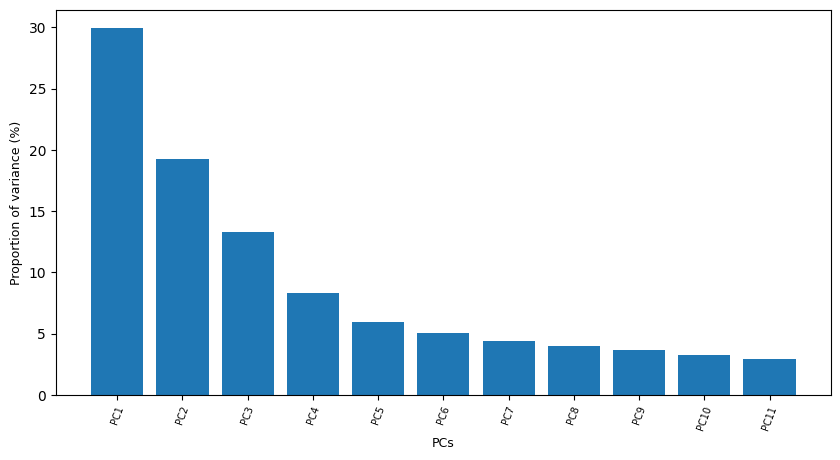

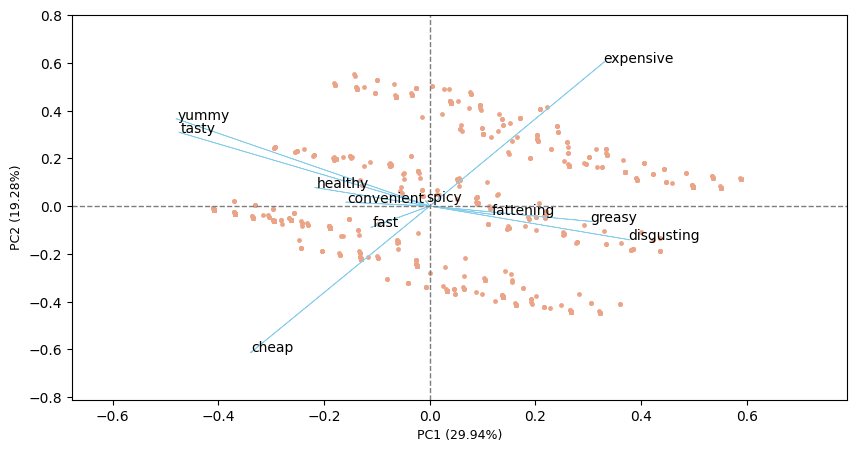

In [23]:

#Scree plot (Elbow test)- PCA
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(10,5))# get PC scores
pca_scores = PCA().fit_transform(x)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=dataset.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

<ipython-input-24-f147ee8652a4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  f = sns.countplot(x=dataset["cluster_num"], palette='hsv')


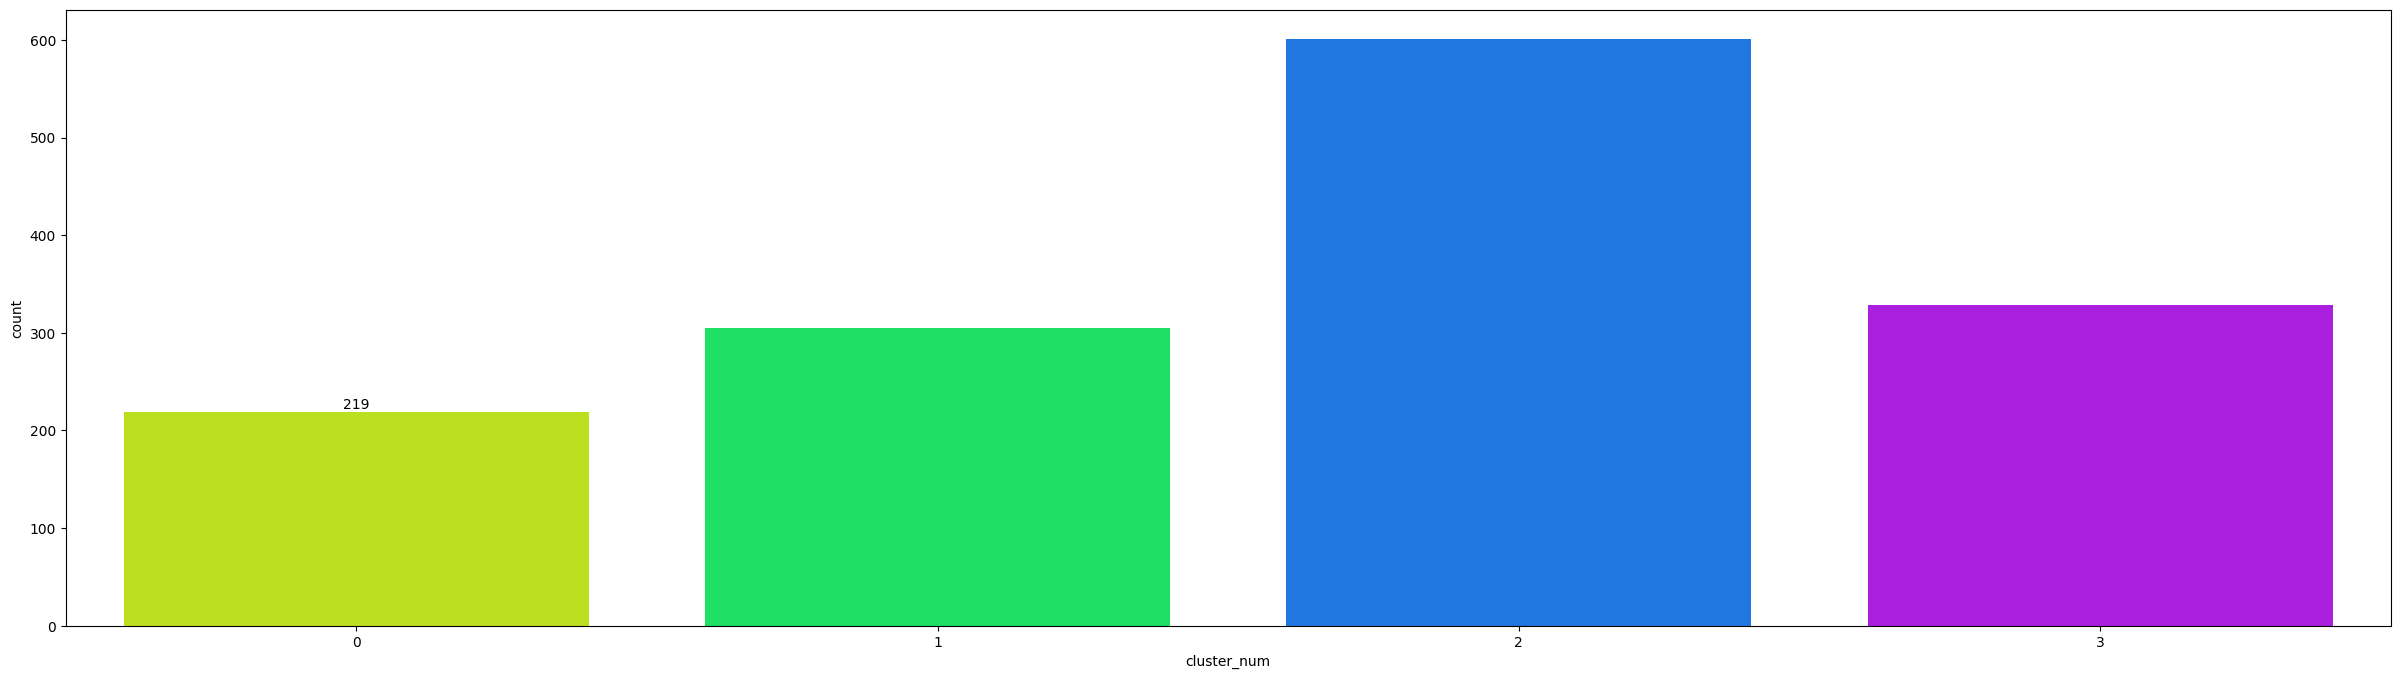

In [24]:
f = sns.countplot(x=dataset["cluster_num"], palette='hsv')
f.bar_label(f.containers[0])
plt.rcParams['figure.figsize'] = (25, 8)
# print(len(dataset['cluster_num'][1]))

In [25]:
dataset1=pd.get_dummies(dataset, prefix=['cluster_num'], columns=['cluster_num'])

In [26]:
dataset1

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num_0,cluster_num_1,cluster_num_2,cluster_num_3
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,True,False,False,False
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,Female,False,False,False,True
2,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,Female,False,False,False,True
3,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,Female,False,False,True,False
4,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,Male,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male,False,True,False,False
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,Once a week,Female,False,False,True,False
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,Once a month,Female,False,False,False,True
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,Every three months,Male,False,False,True,False


In [27]:
#Gender
# df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
result=[]
for i in cols:
    Gender = dataset.groupby(['cluster_num'])[i].mean()
    Gender = Gender.to_frame().reset_index()
    result.append(Gender)

In [28]:
for i in range(len(result)):
    print(pd.DataFrame(result[i]))

   cluster_num     yummy
0            0  0.082192
1            1  0.006557
2            2  0.856905
3            3  0.817073
   cluster_num  convenient
0            0    0.863014
1            1    0.737705
2            2    0.980033
3            3    0.963415
   cluster_num     spicy
0            0  0.063927
1            1  0.085246
2            2  0.089850
3            3  0.128049
   cluster_num  fattening
0            0   0.767123
1            1   0.986885
2            2   0.813644
3            3   0.920732
   cluster_num    greasy
0            0  0.214612
1            1  0.927869
2            2  0.376040
3            3  0.637195
   cluster_num      fast
0            0  0.853881
1            1  0.836066
2            2  0.965058
3            3  0.871951
   cluster_num     cheap
0            0  0.328767
1            1  0.632787
2            2  0.950083
3            3  0.103659
   cluster_num     tasty
0            0  0.063927
1            1  0.068852
2            2  0.976705
3         

In [29]:
dataset1=pd.get_dummies(dataset, prefix=['VisitFrequency'], columns=['VisitFrequency'])

In [30]:
dataset1

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,...,Like,Age,Gender,cluster_num,VisitFrequency_Every three months,VisitFrequency_More than once a week,VisitFrequency_Never,VisitFrequency_Once a month,VisitFrequency_Once a week,VisitFrequency_Once a year
0,0,1,0,1,0,1,1,0,1,0,...,-3,61,Female,0,True,False,False,False,False,False
1,1,1,0,1,1,1,1,1,1,0,...,2,51,Female,3,True,False,False,False,False,False
2,0,1,1,1,1,1,0,1,1,1,...,1,62,Female,3,True,False,False,False,False,False
3,1,1,0,1,1,1,1,1,0,0,...,4,69,Female,2,False,False,False,False,True,False
4,0,1,0,1,1,1,1,0,0,1,...,2,49,Male,1,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,...,-5,47,Male,1,False,False,False,False,False,True
1449,1,1,0,1,0,0,1,1,0,1,...,2,36,Female,2,False,False,False,False,True,False
1450,1,1,0,1,0,1,0,1,1,0,...,3,52,Female,3,False,False,False,True,False,False
1451,1,1,0,0,0,1,1,1,0,1,...,4,41,Male,2,True,False,False,False,False,False


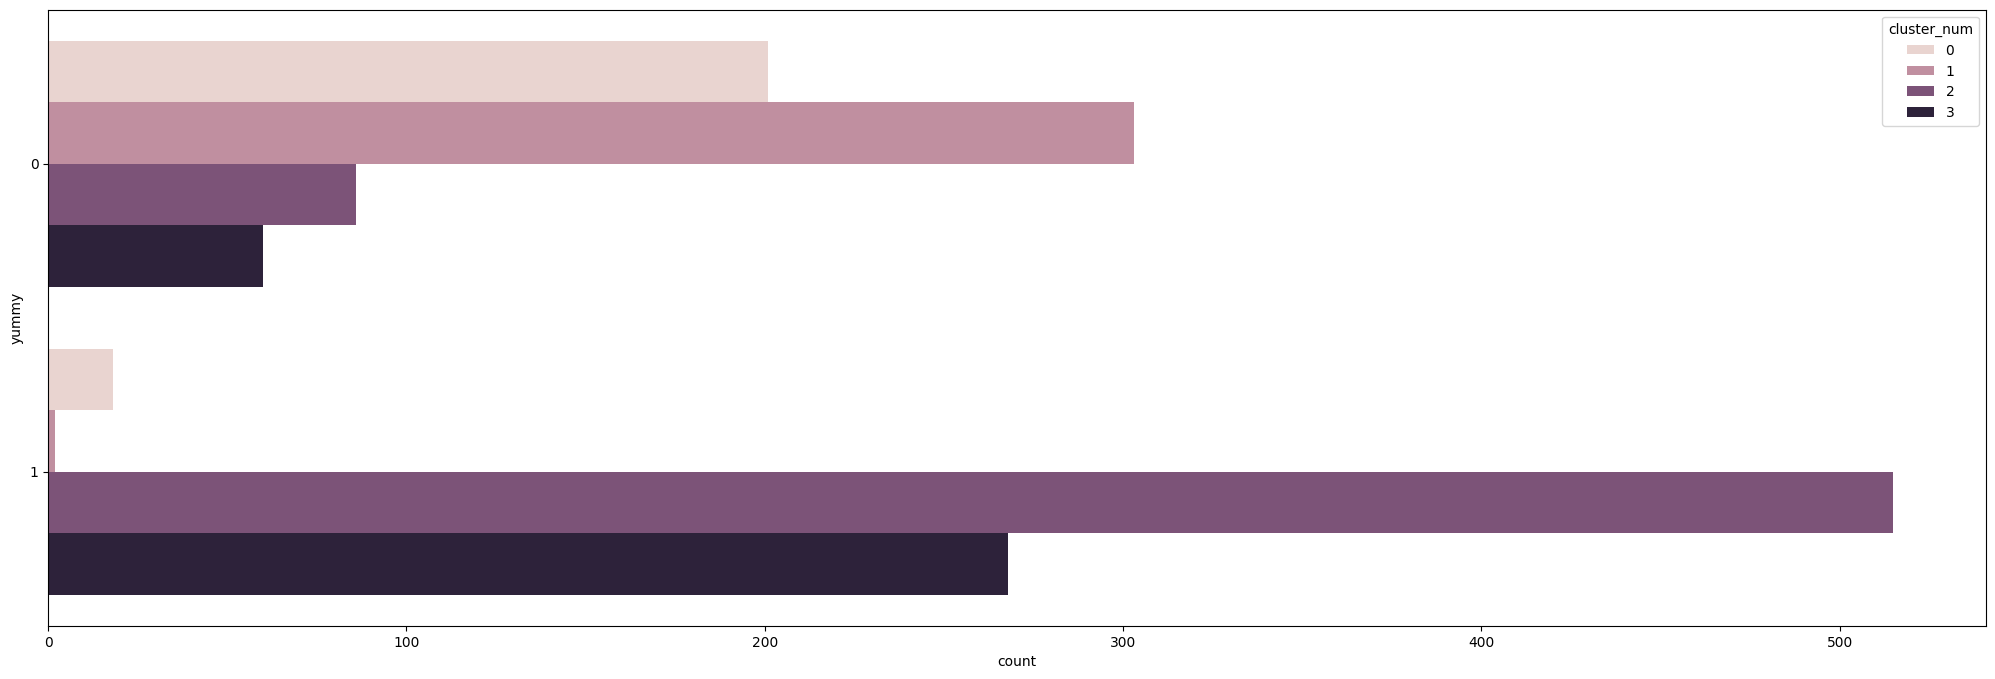

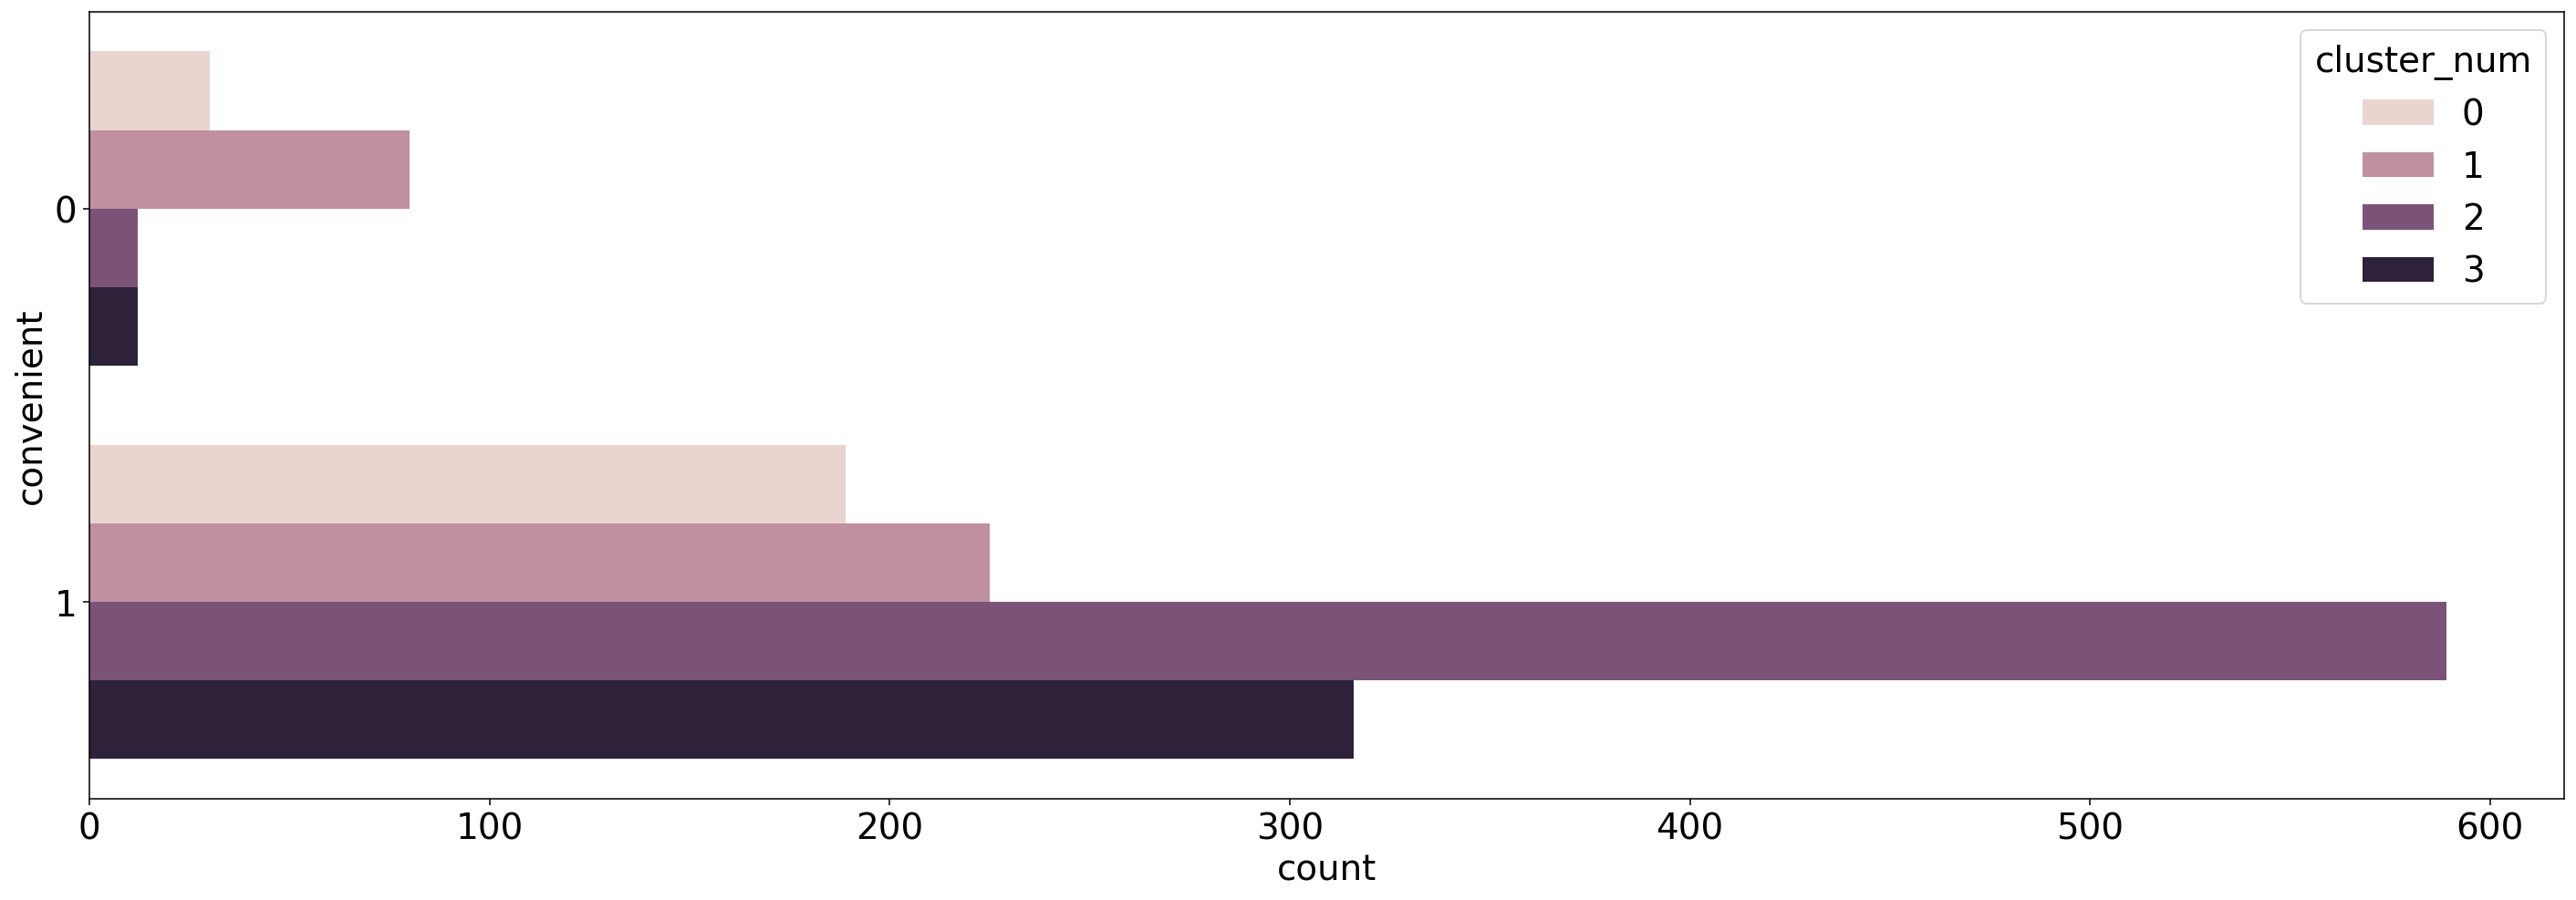

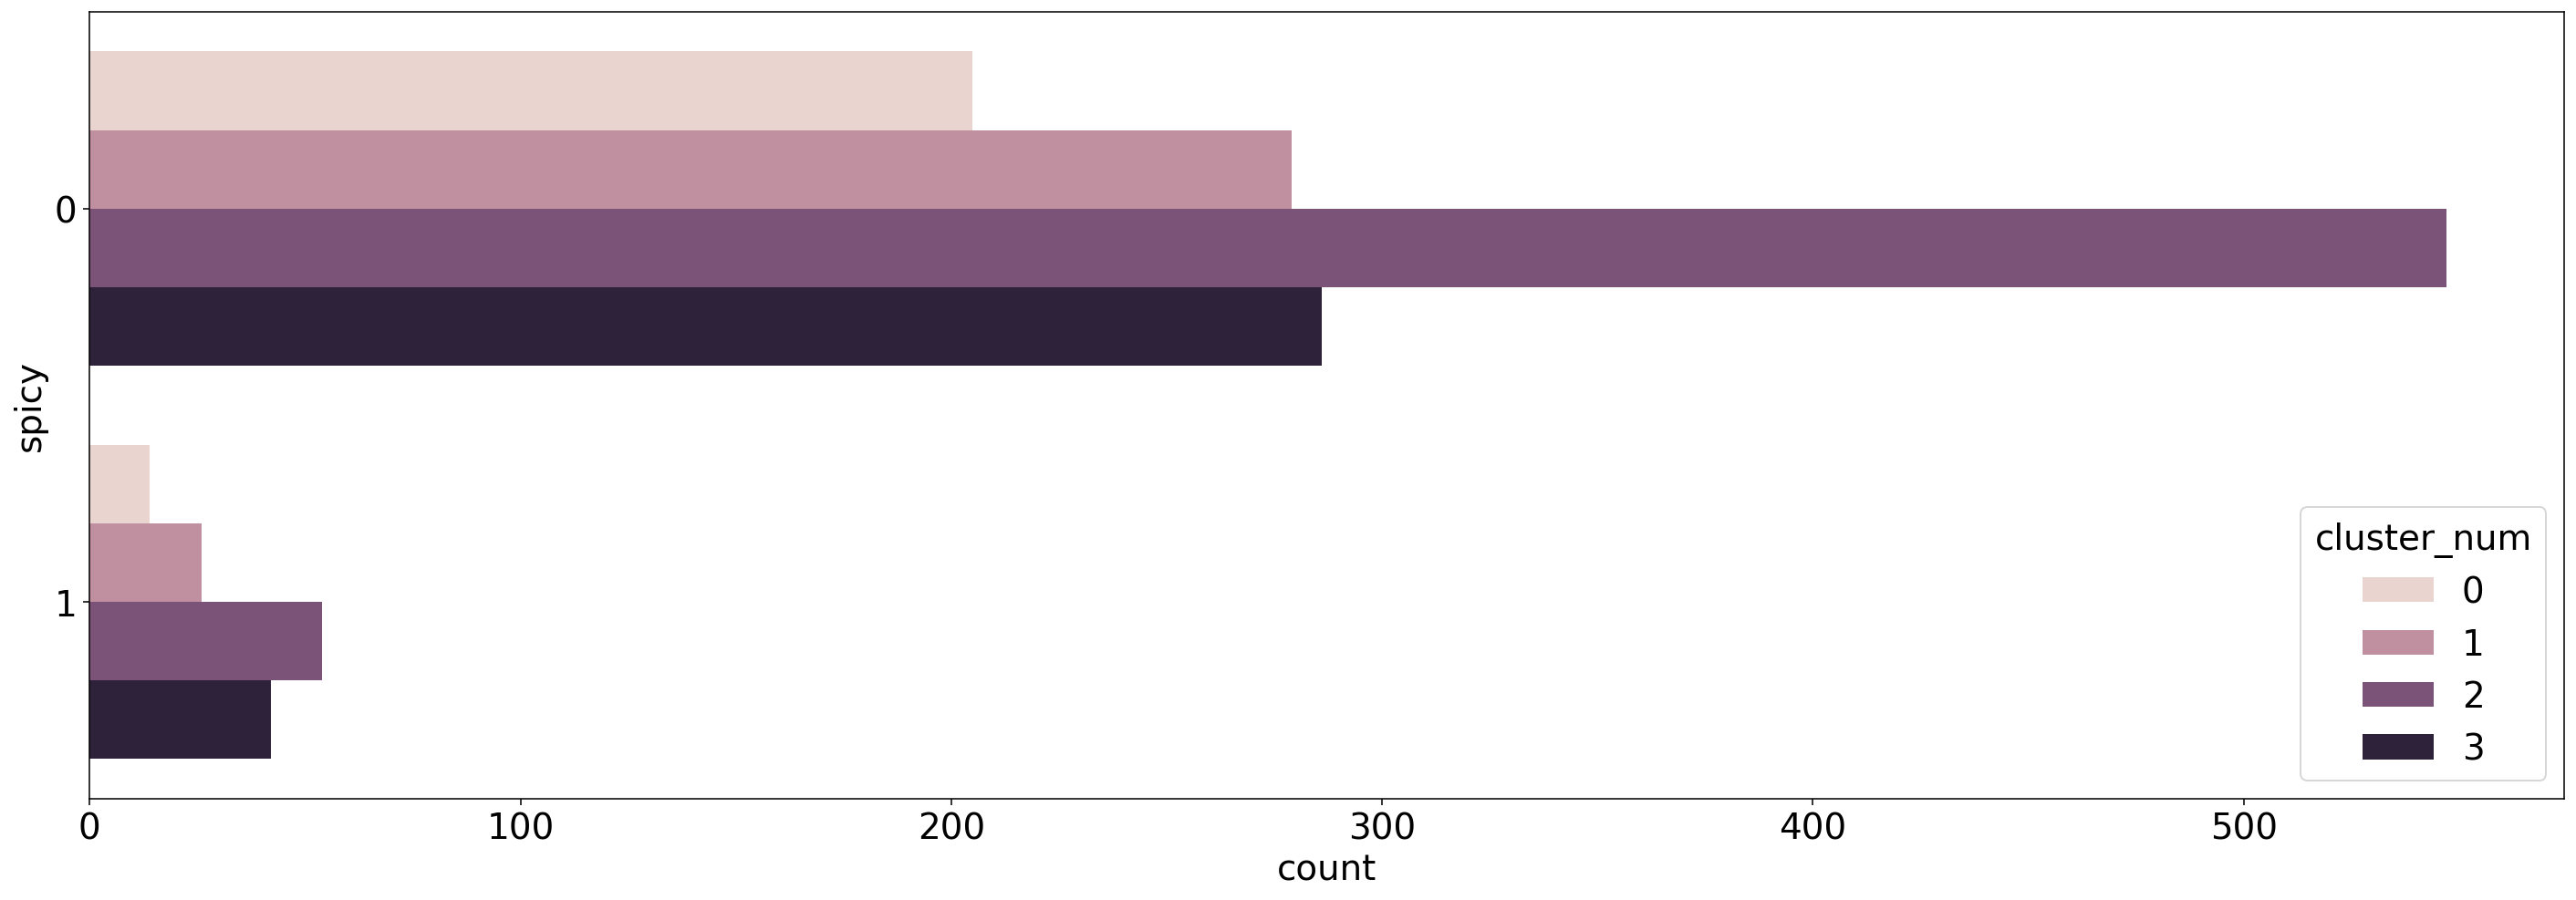

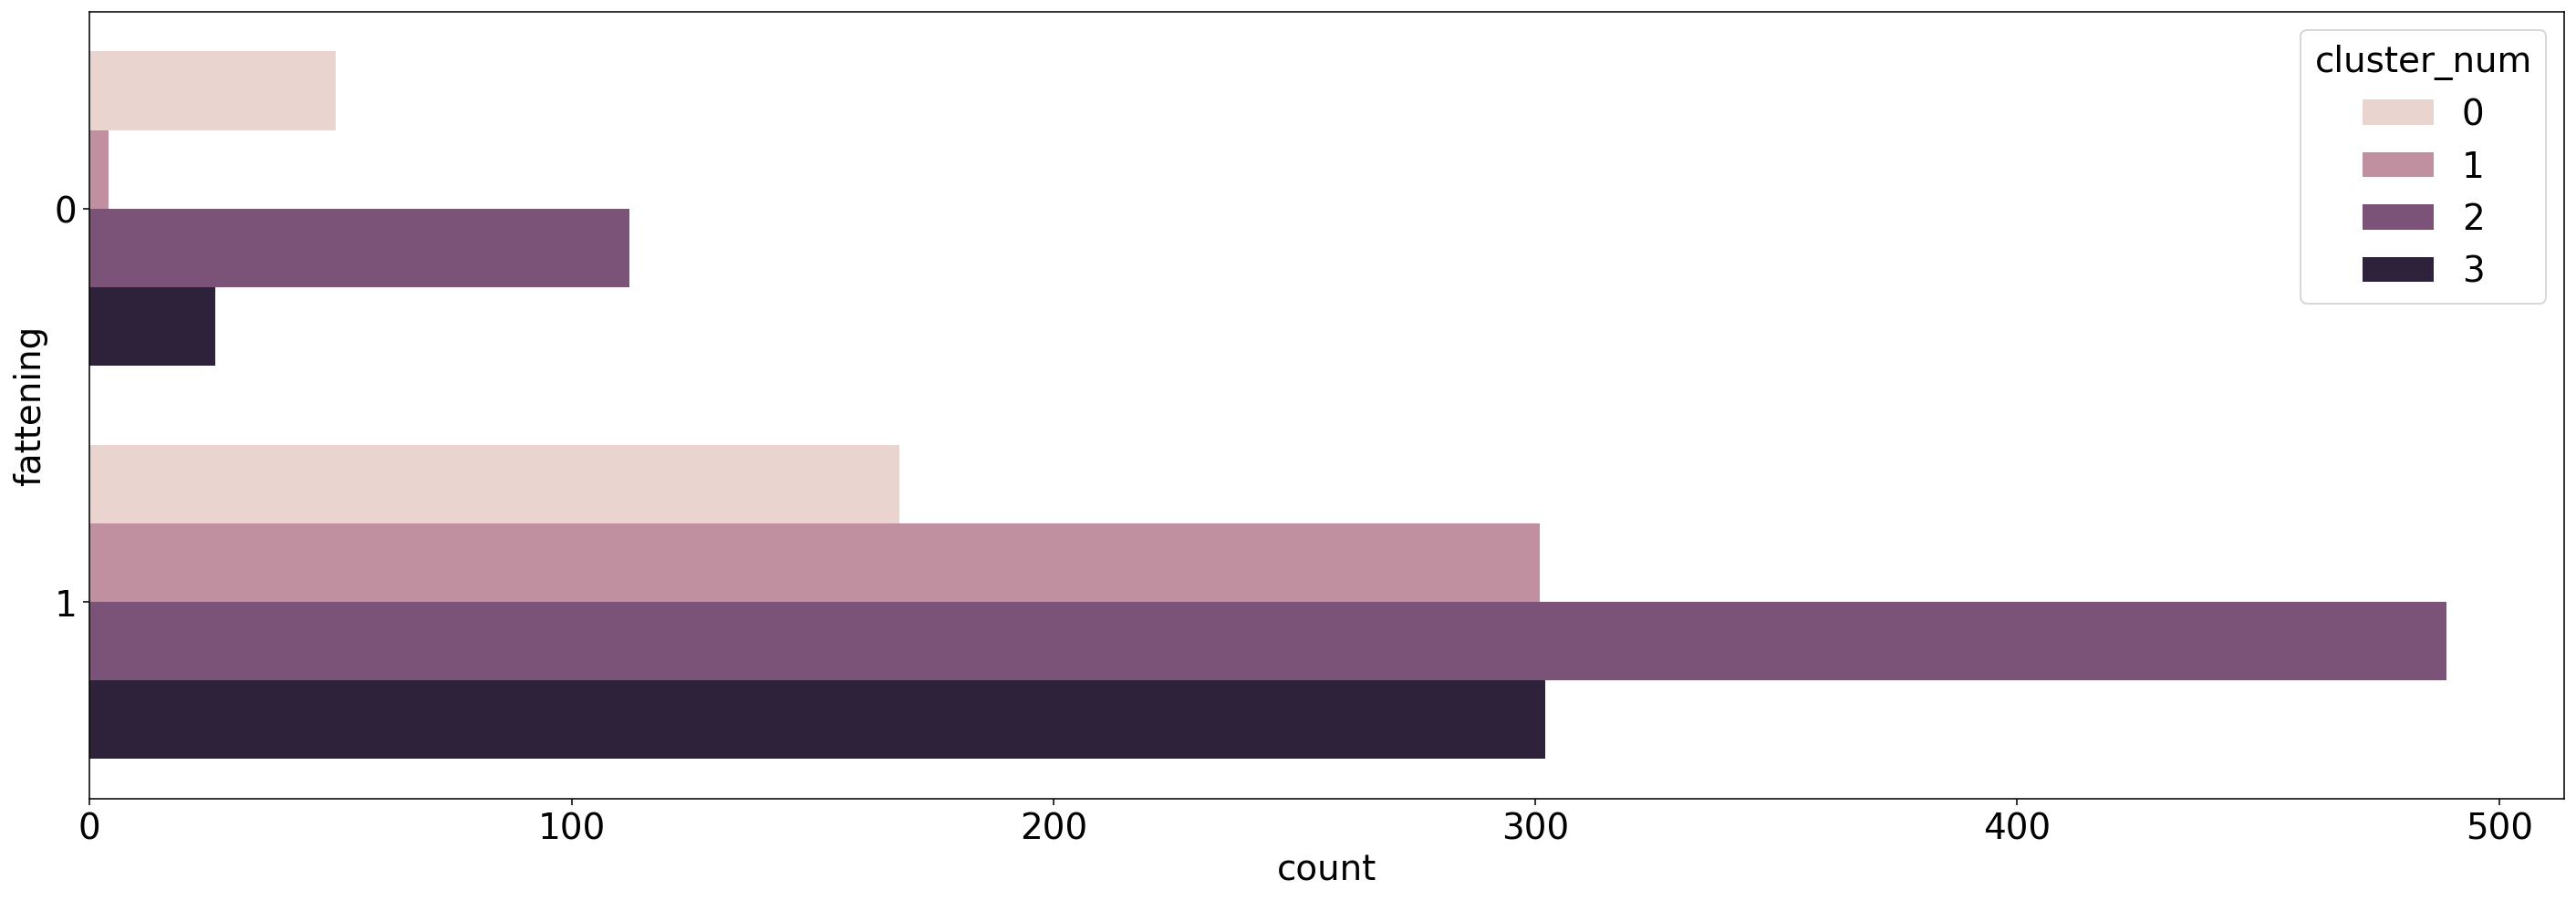

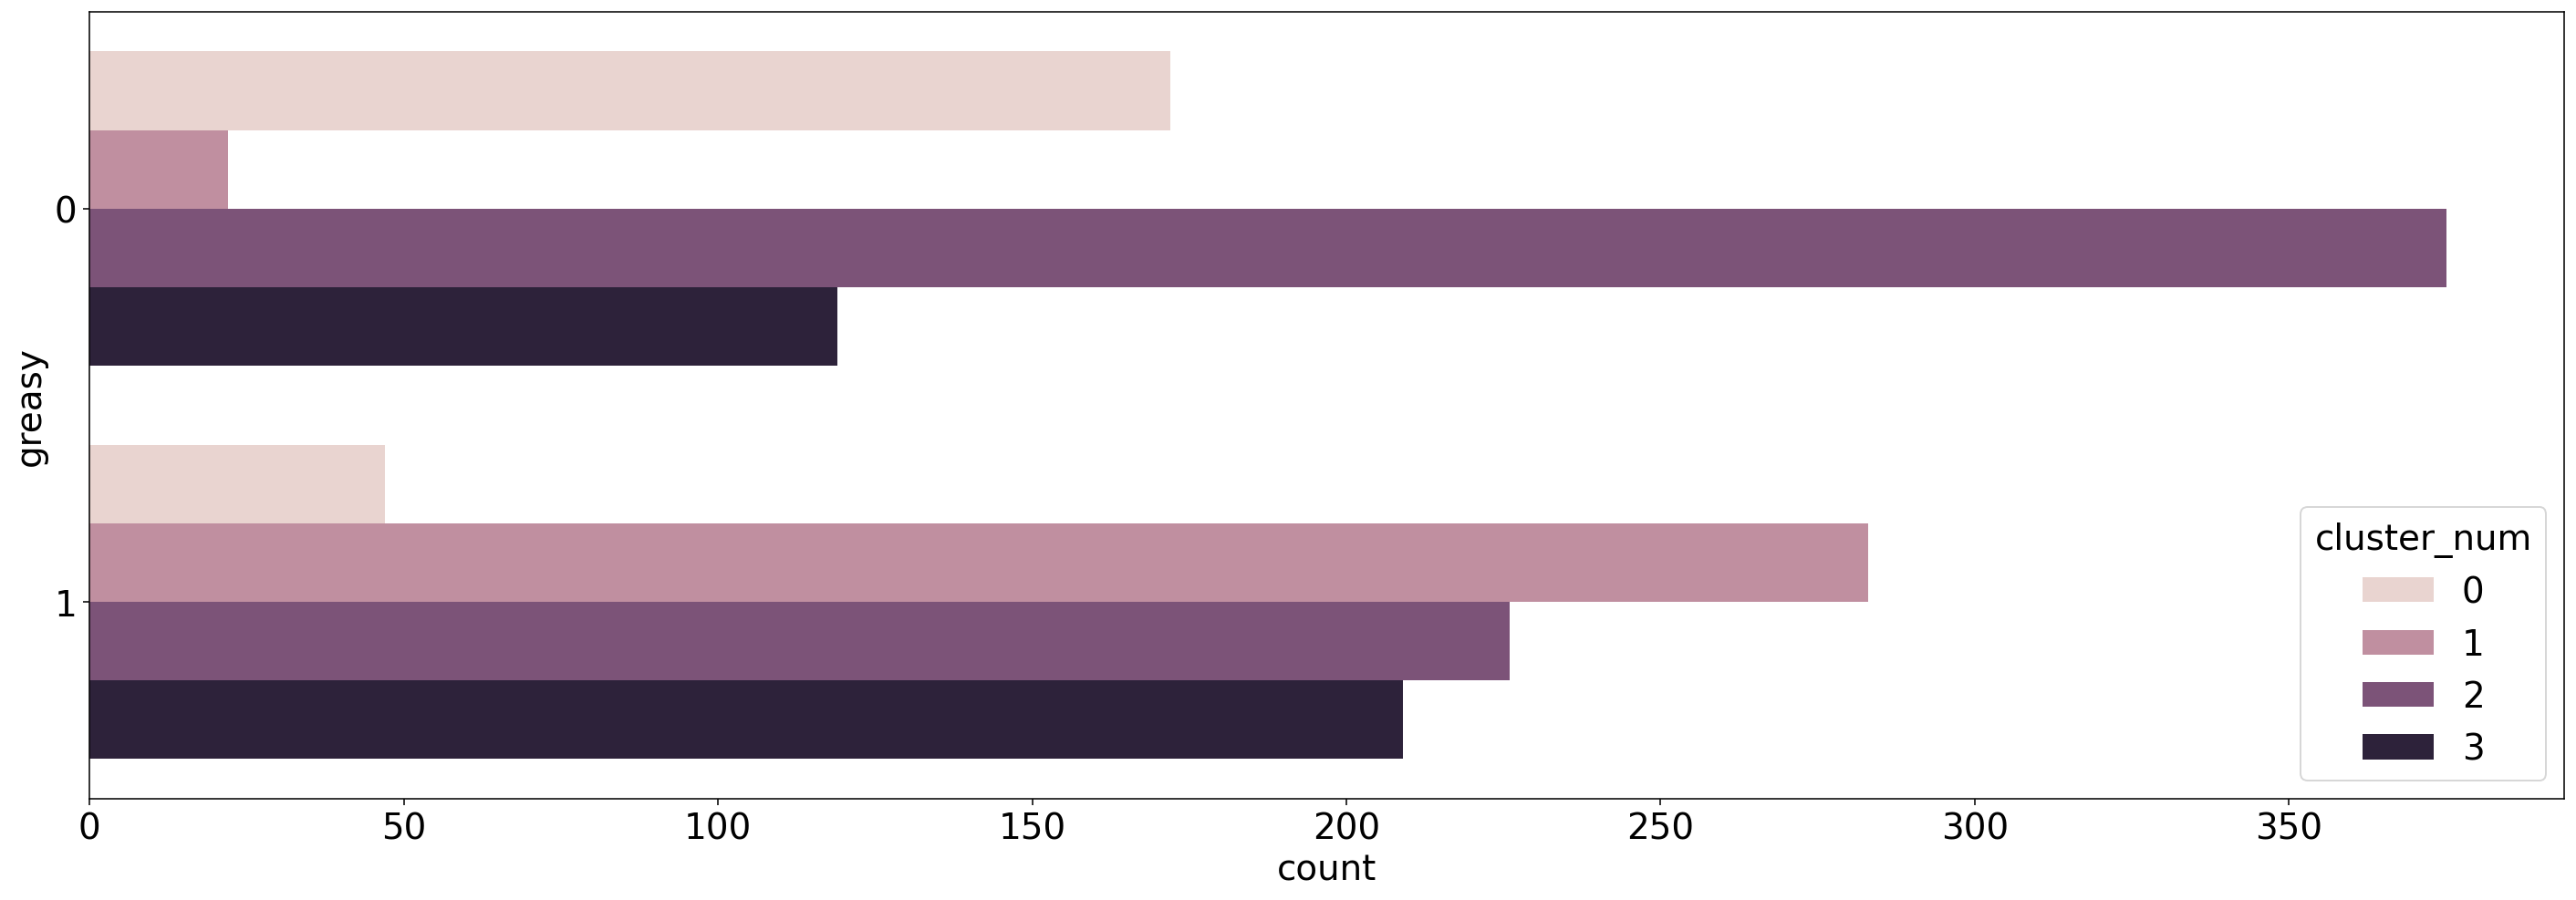

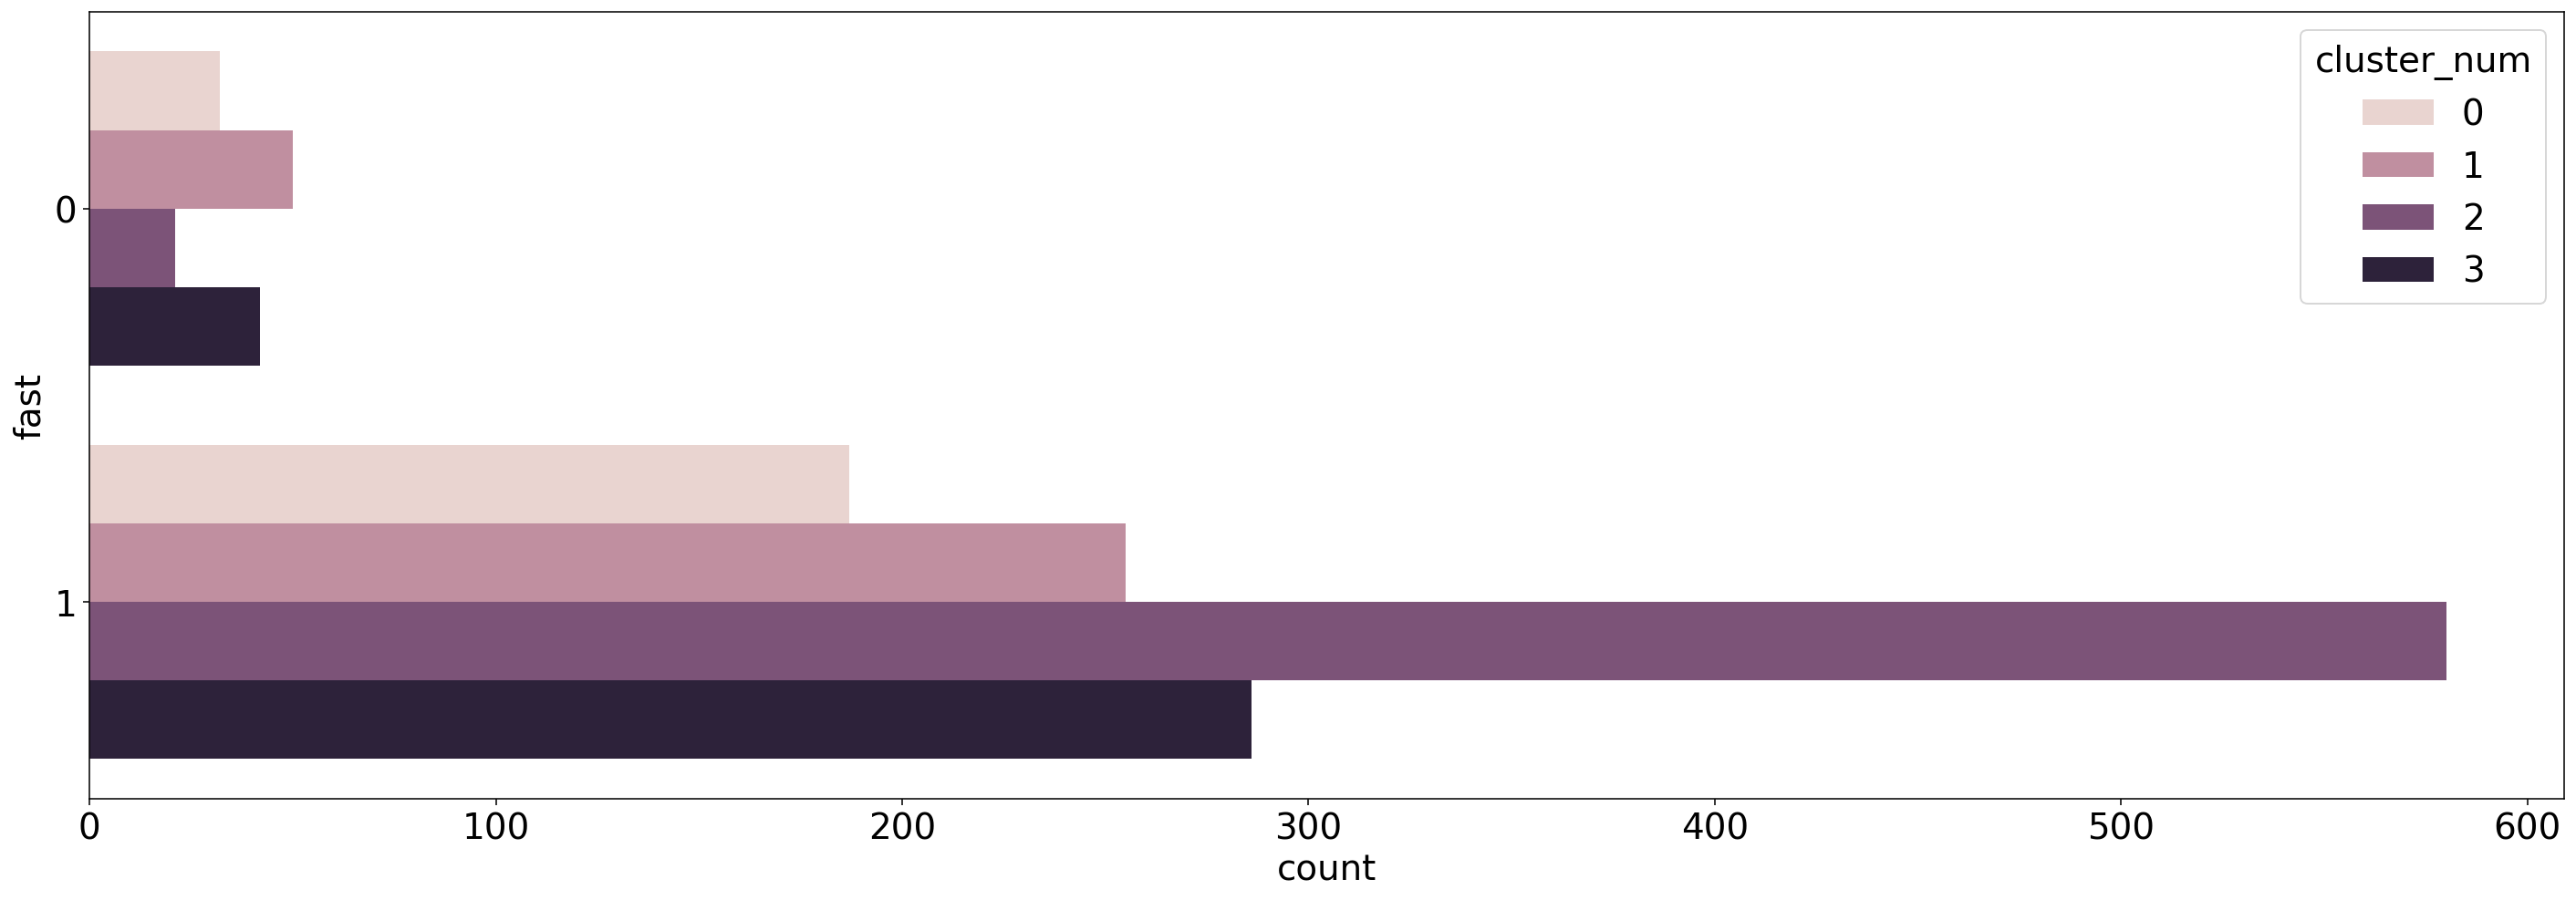

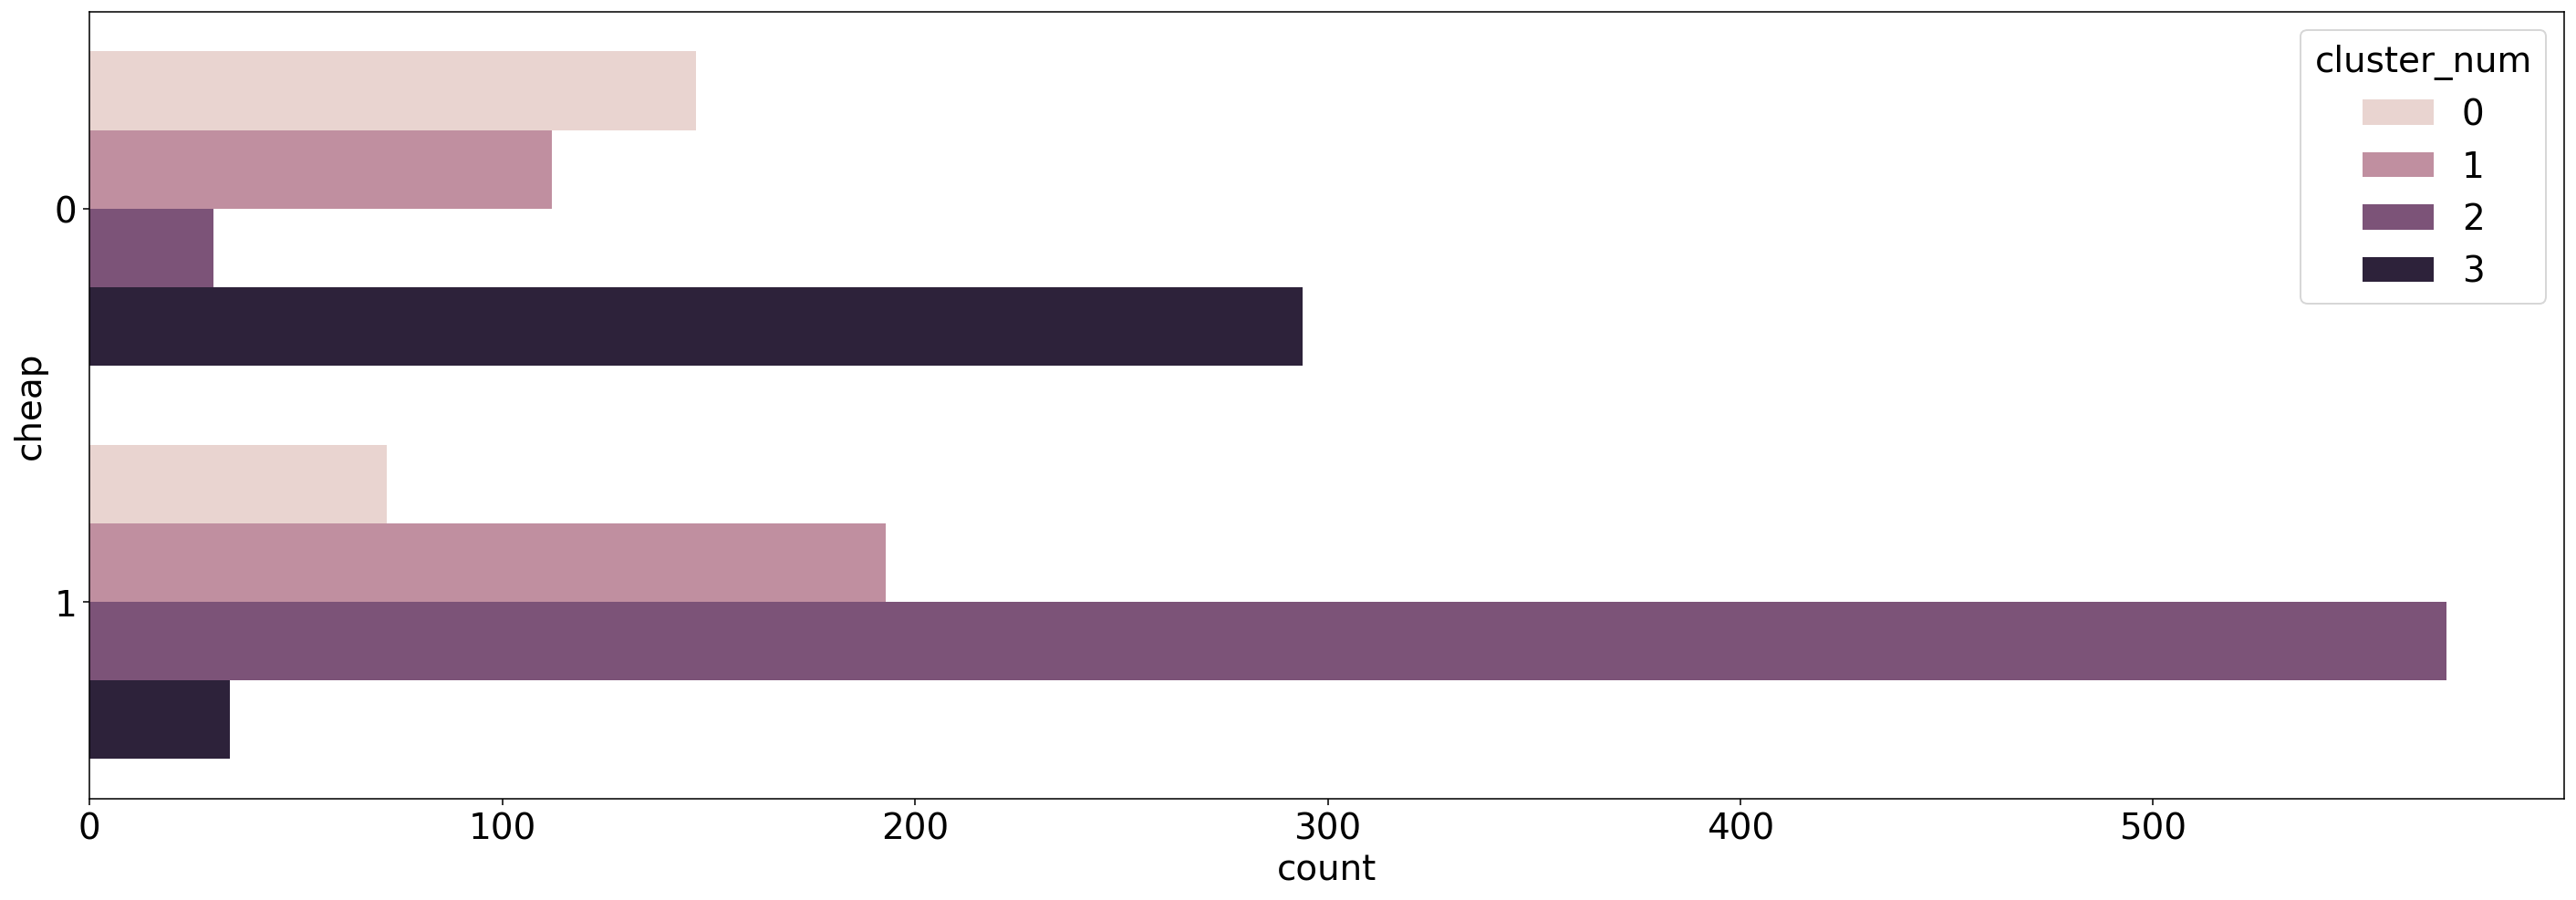

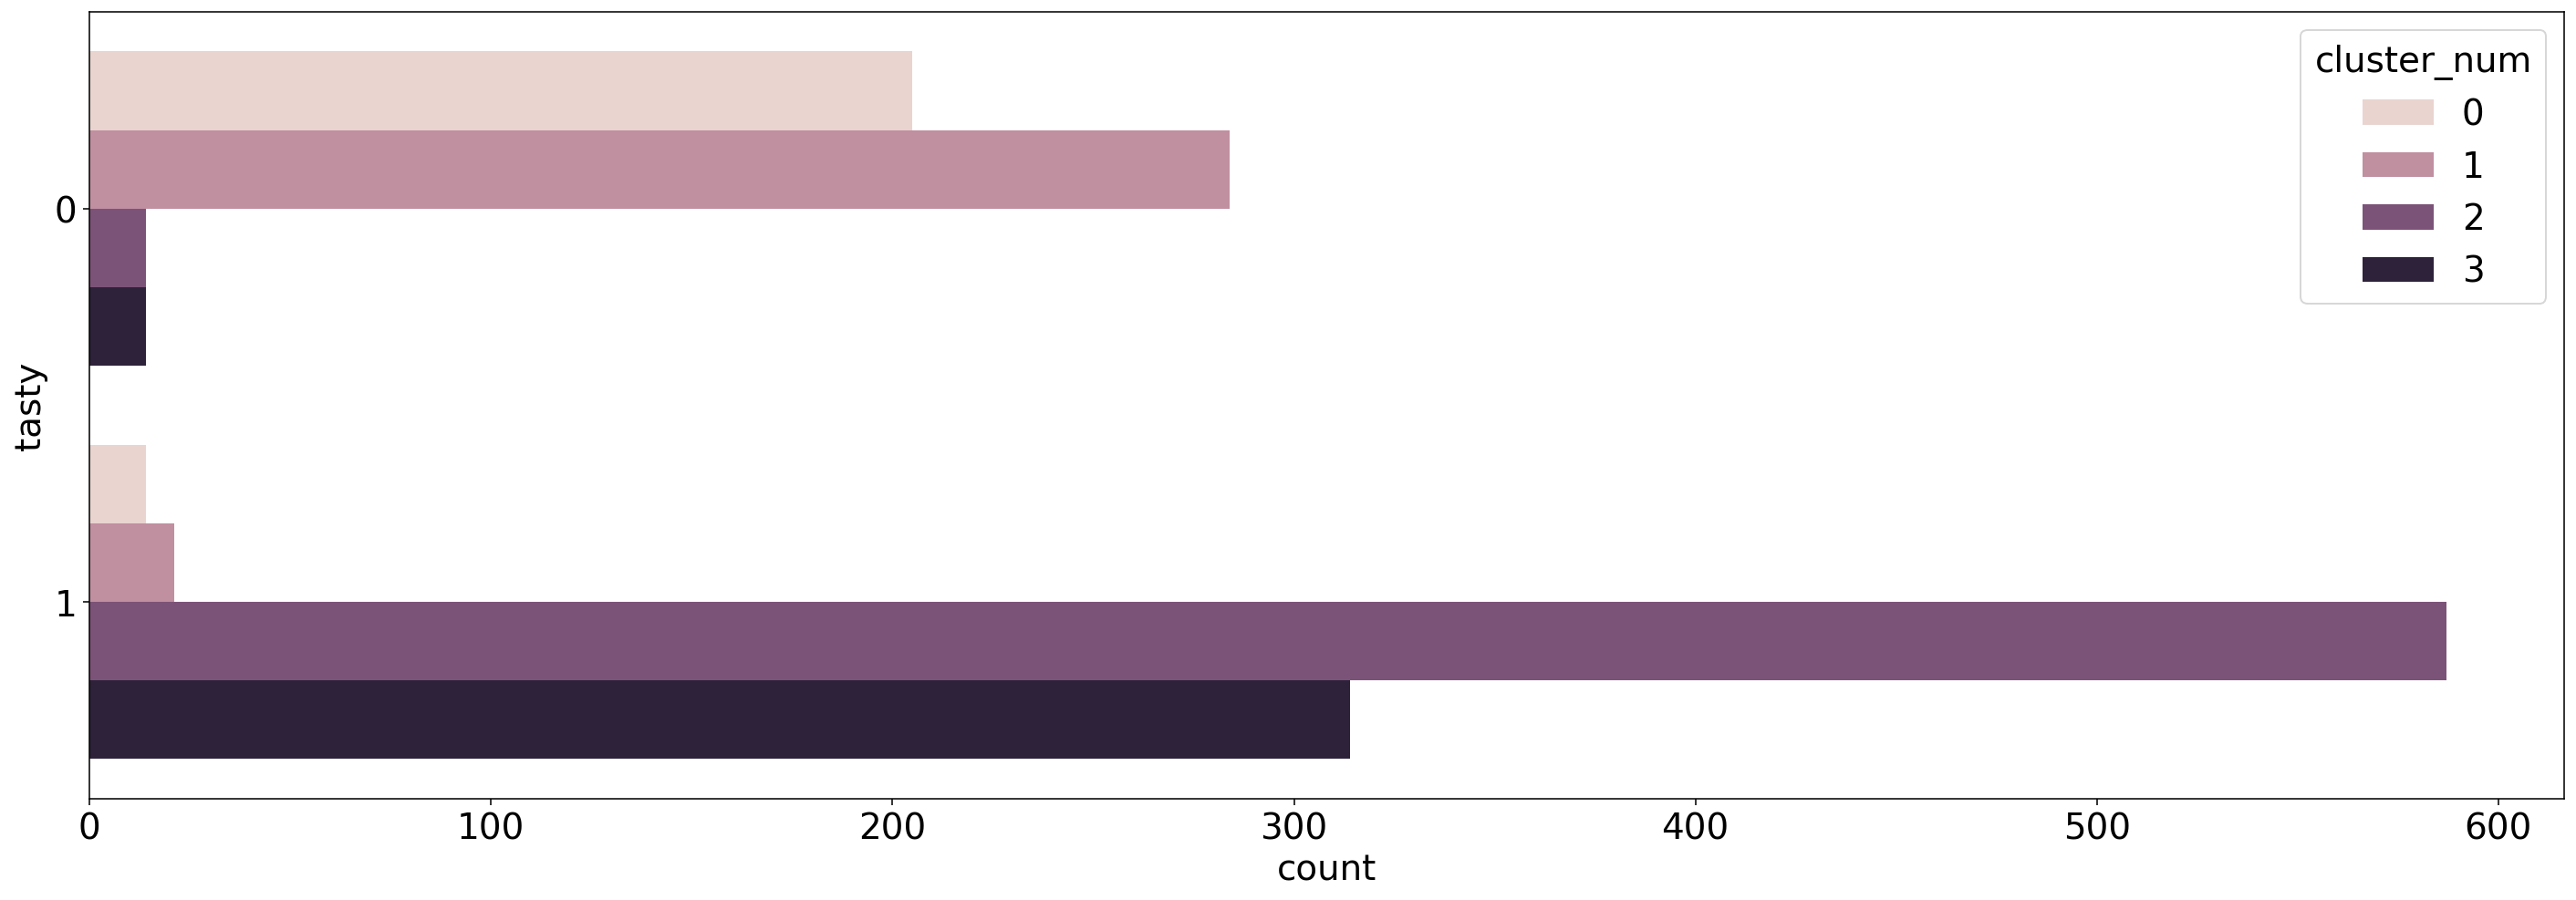

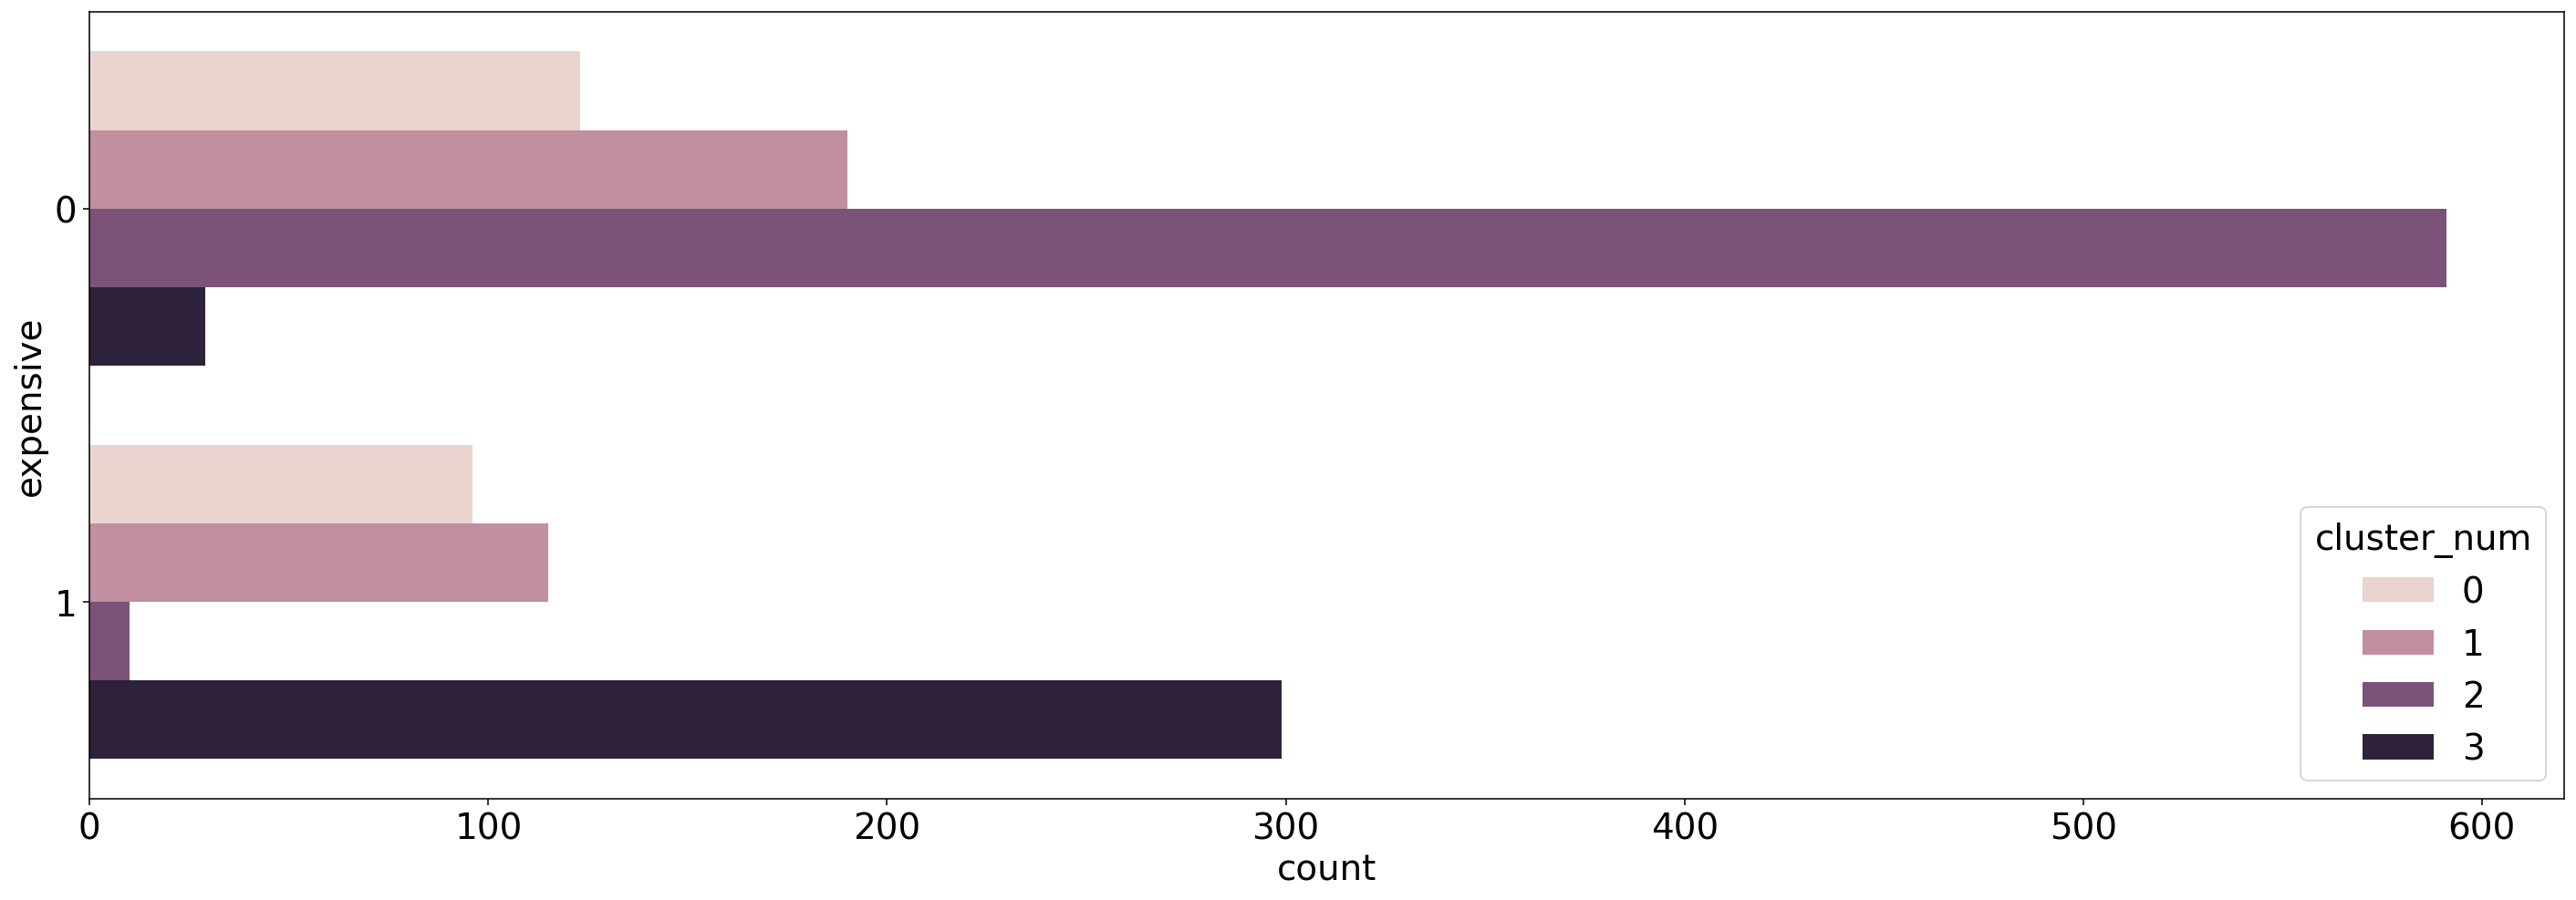

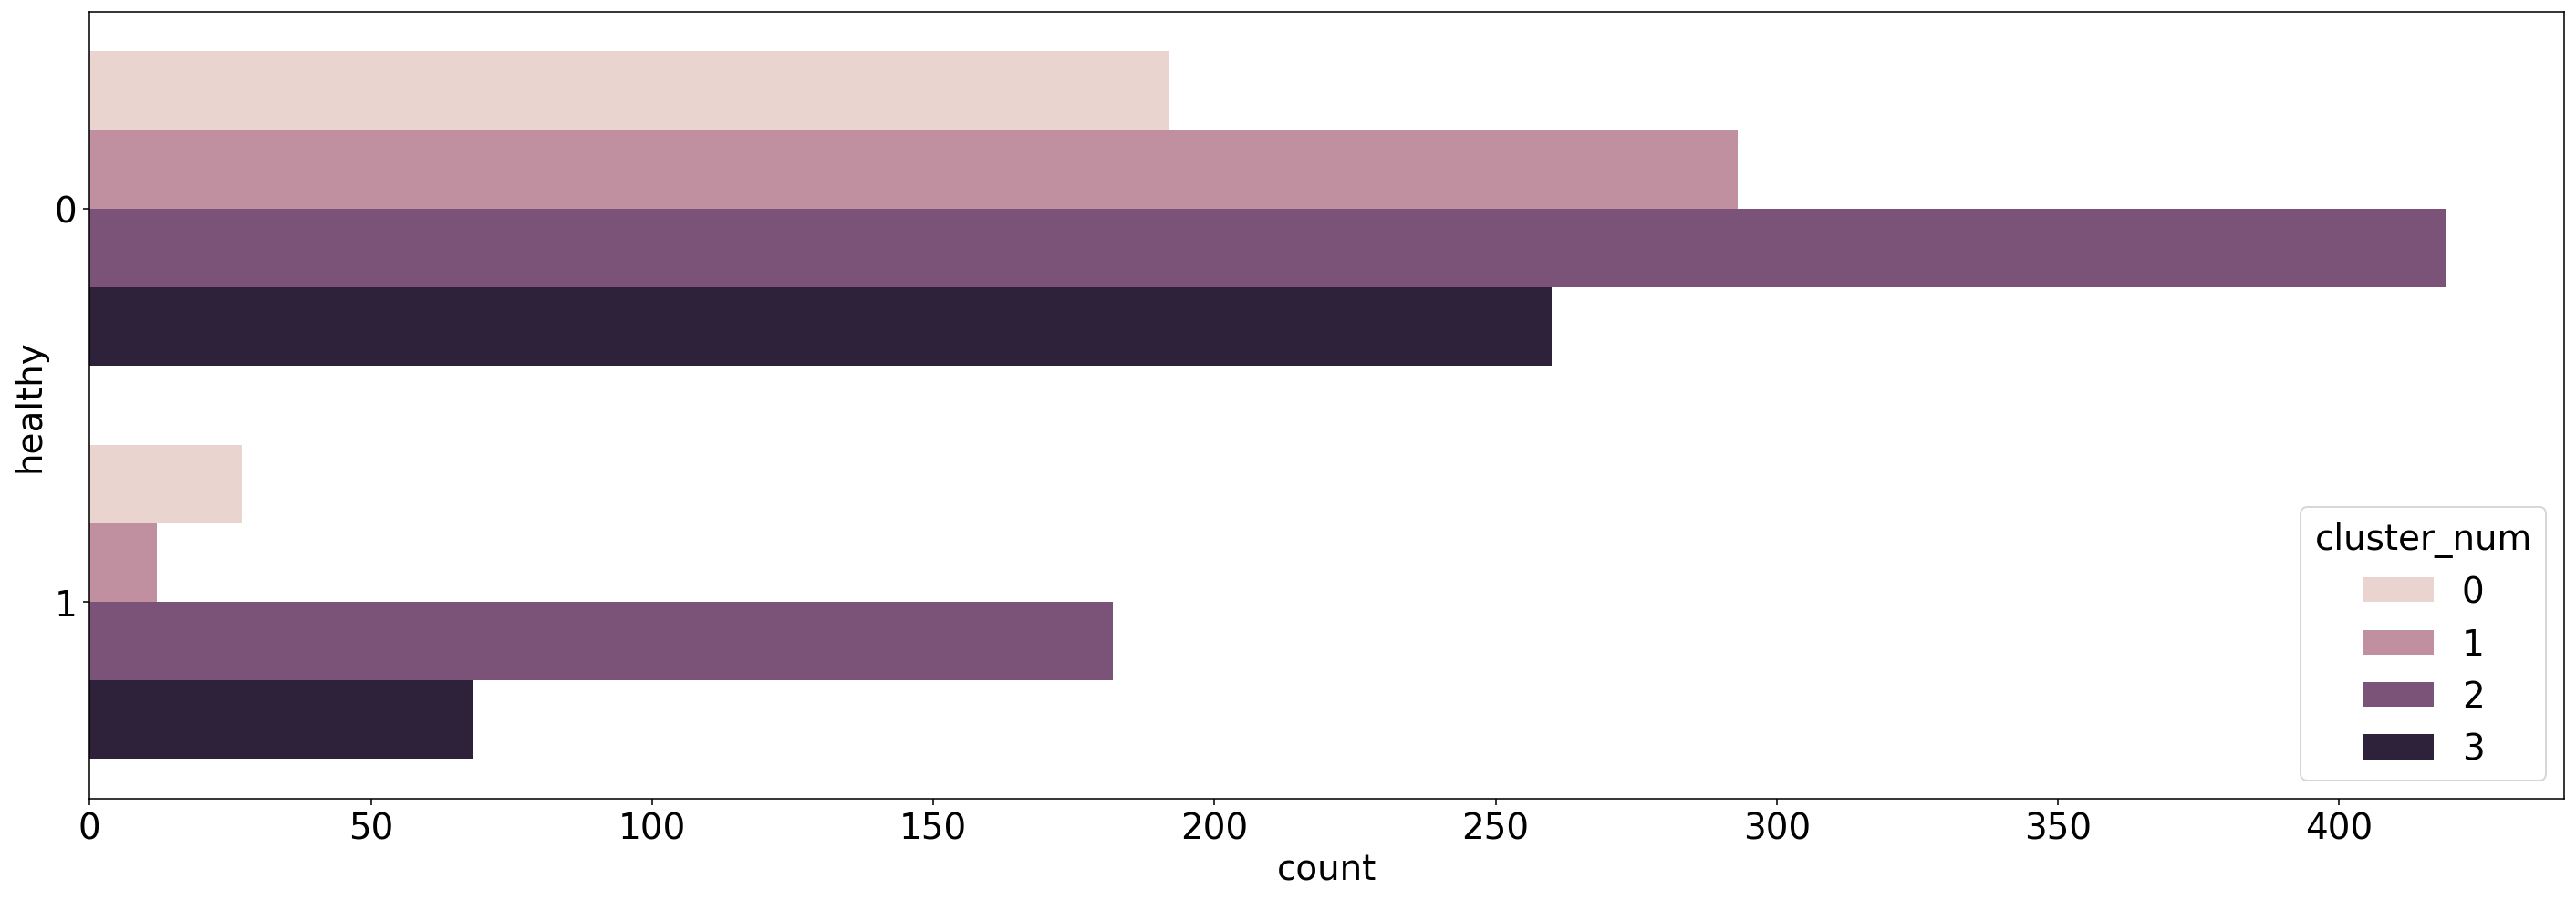

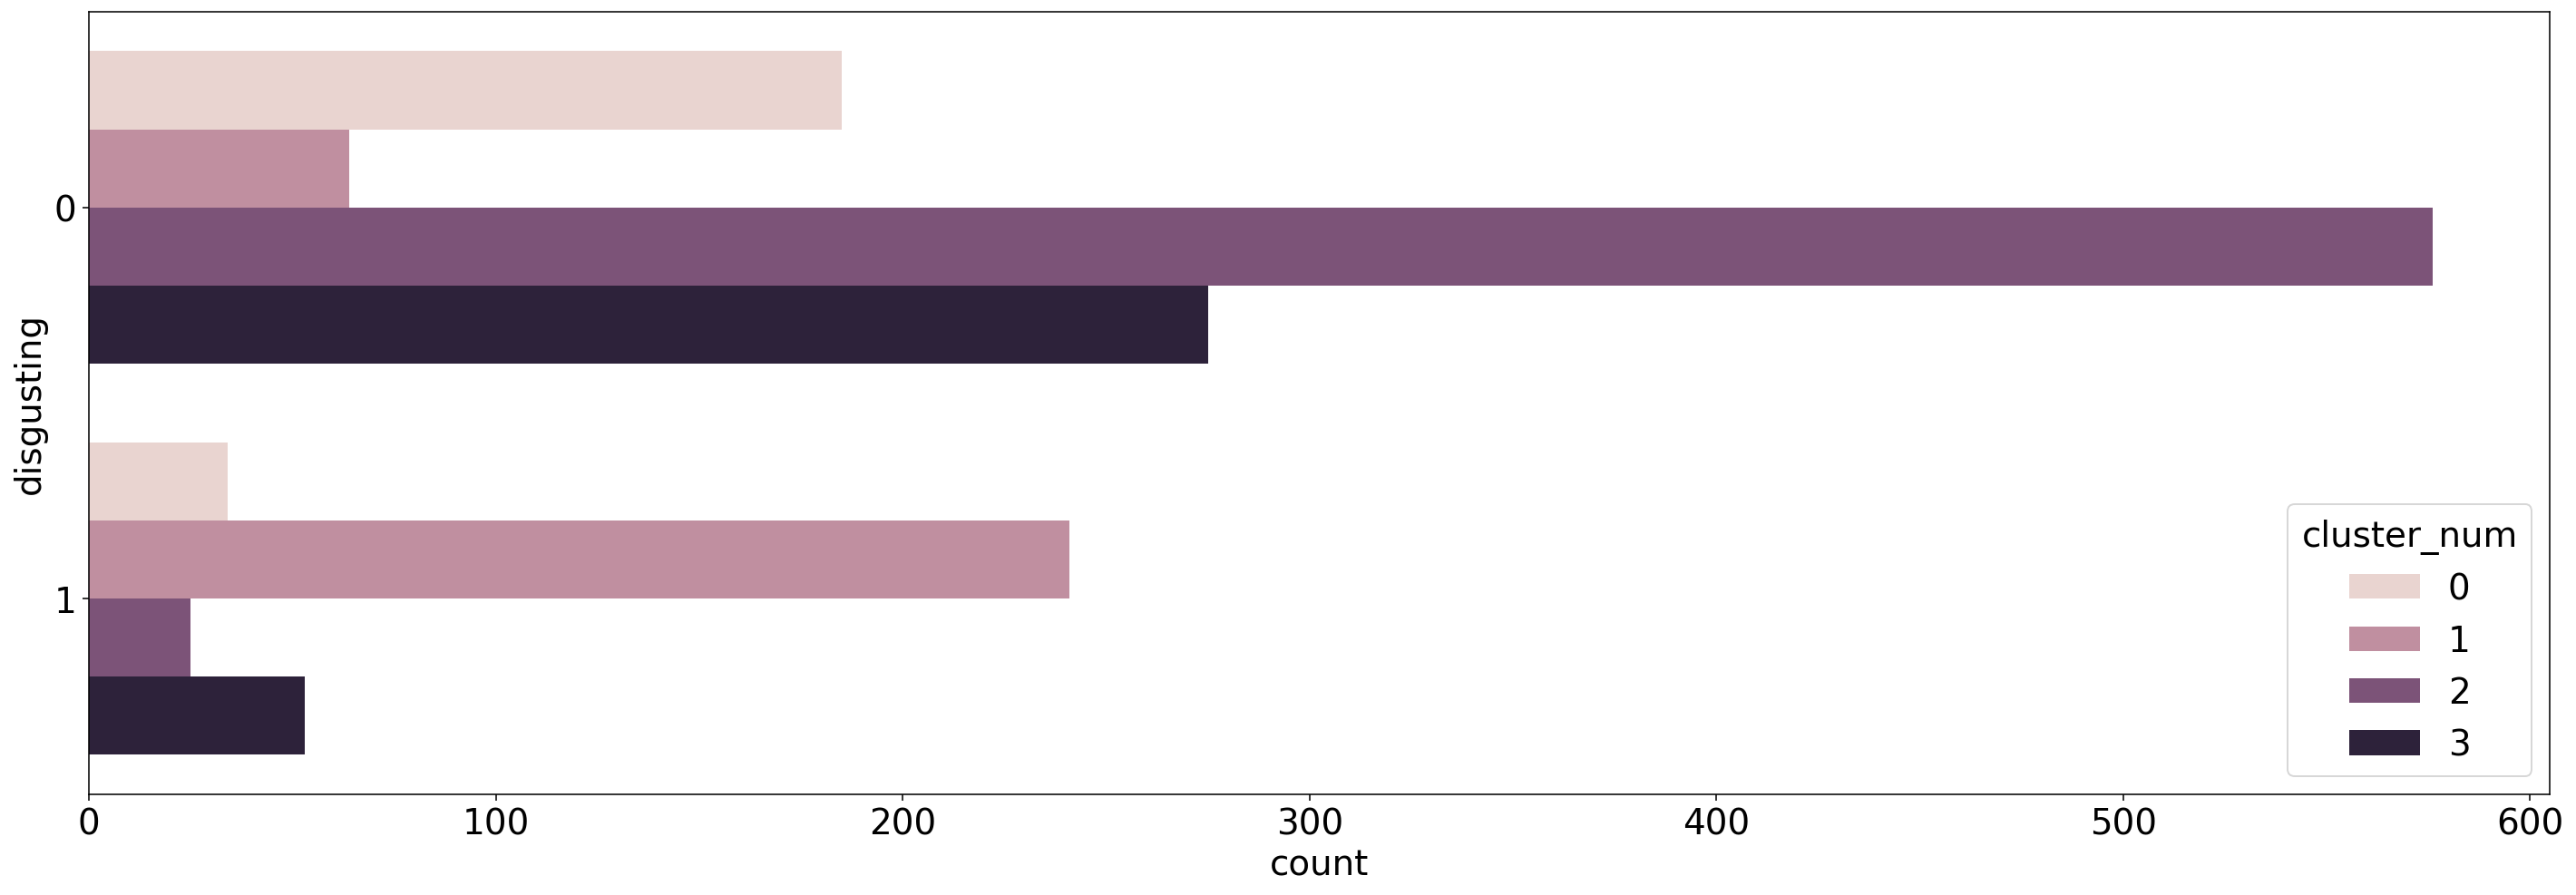

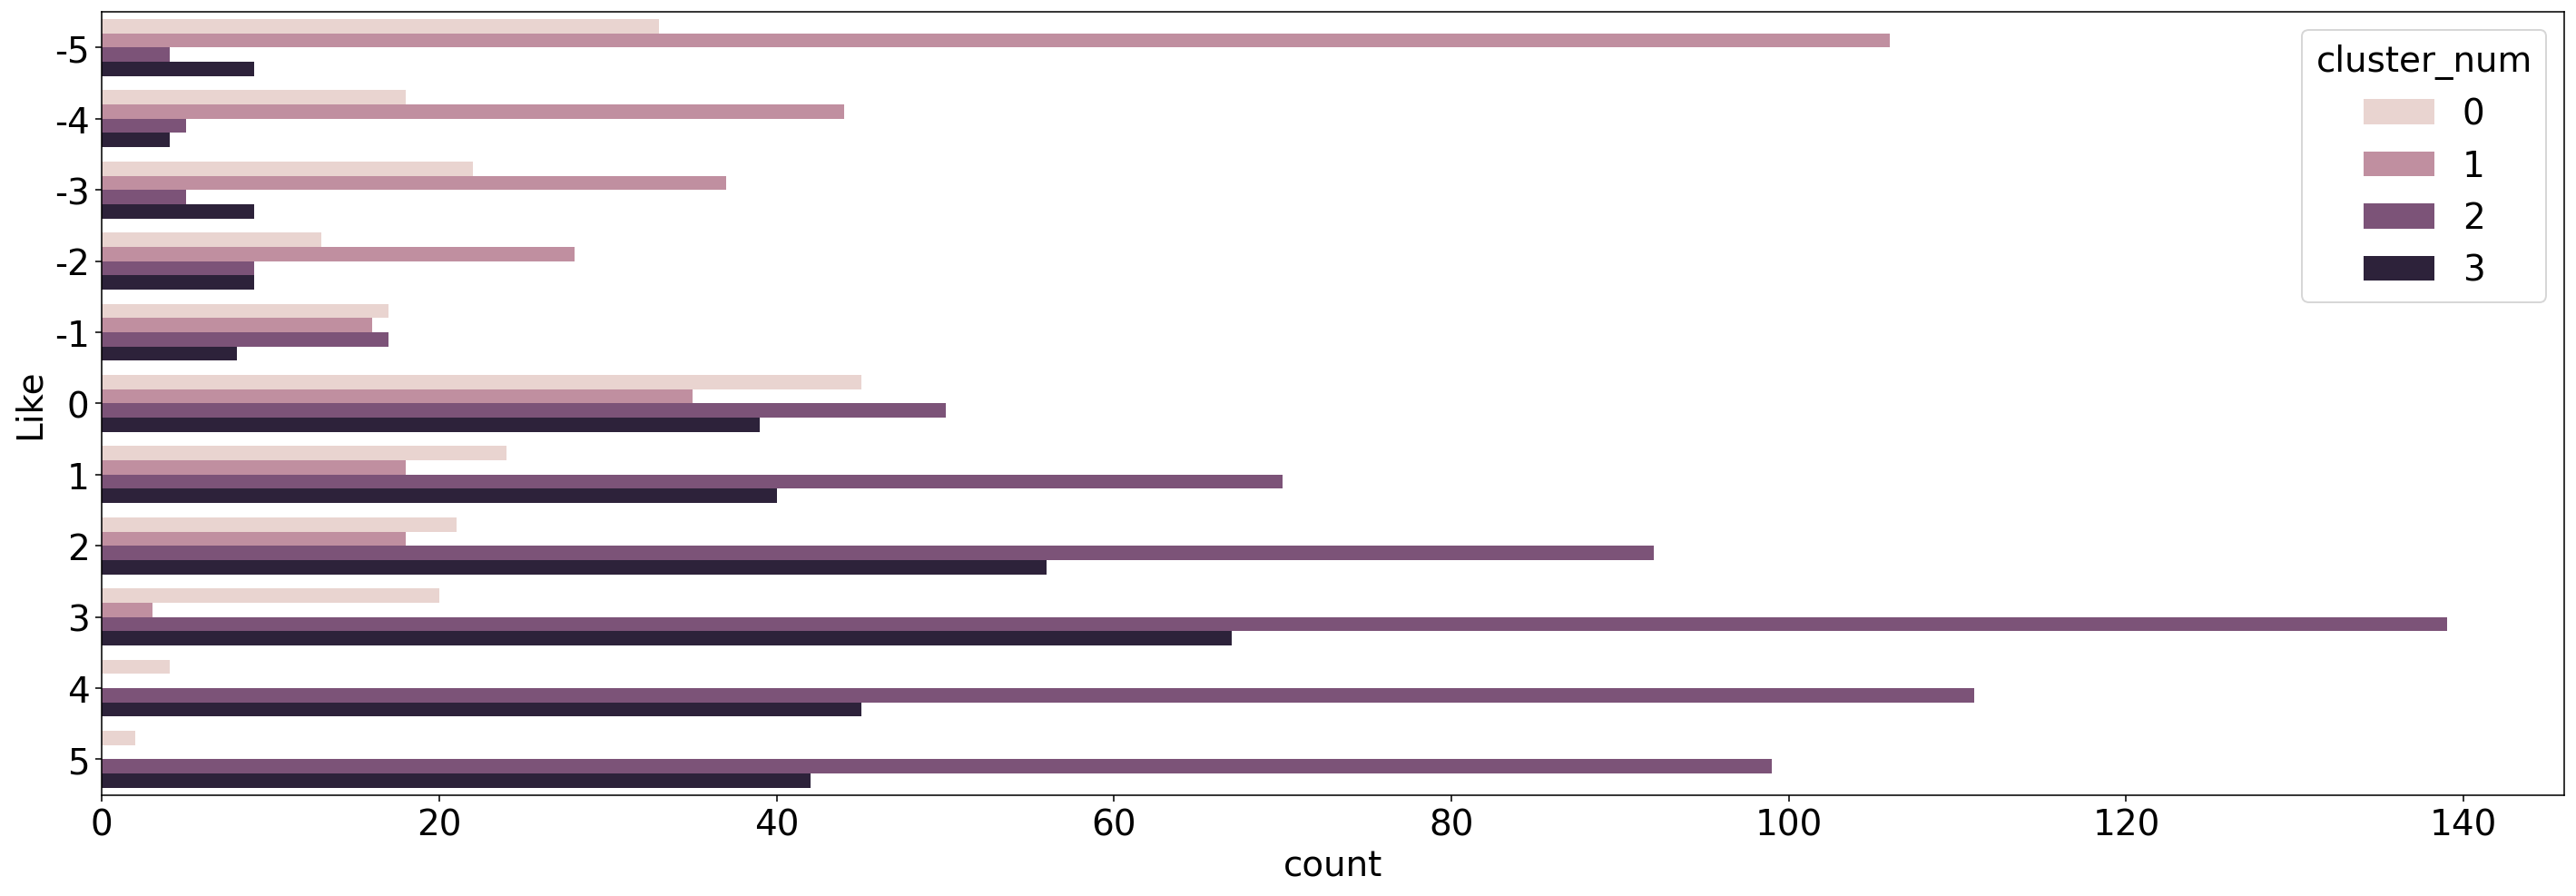

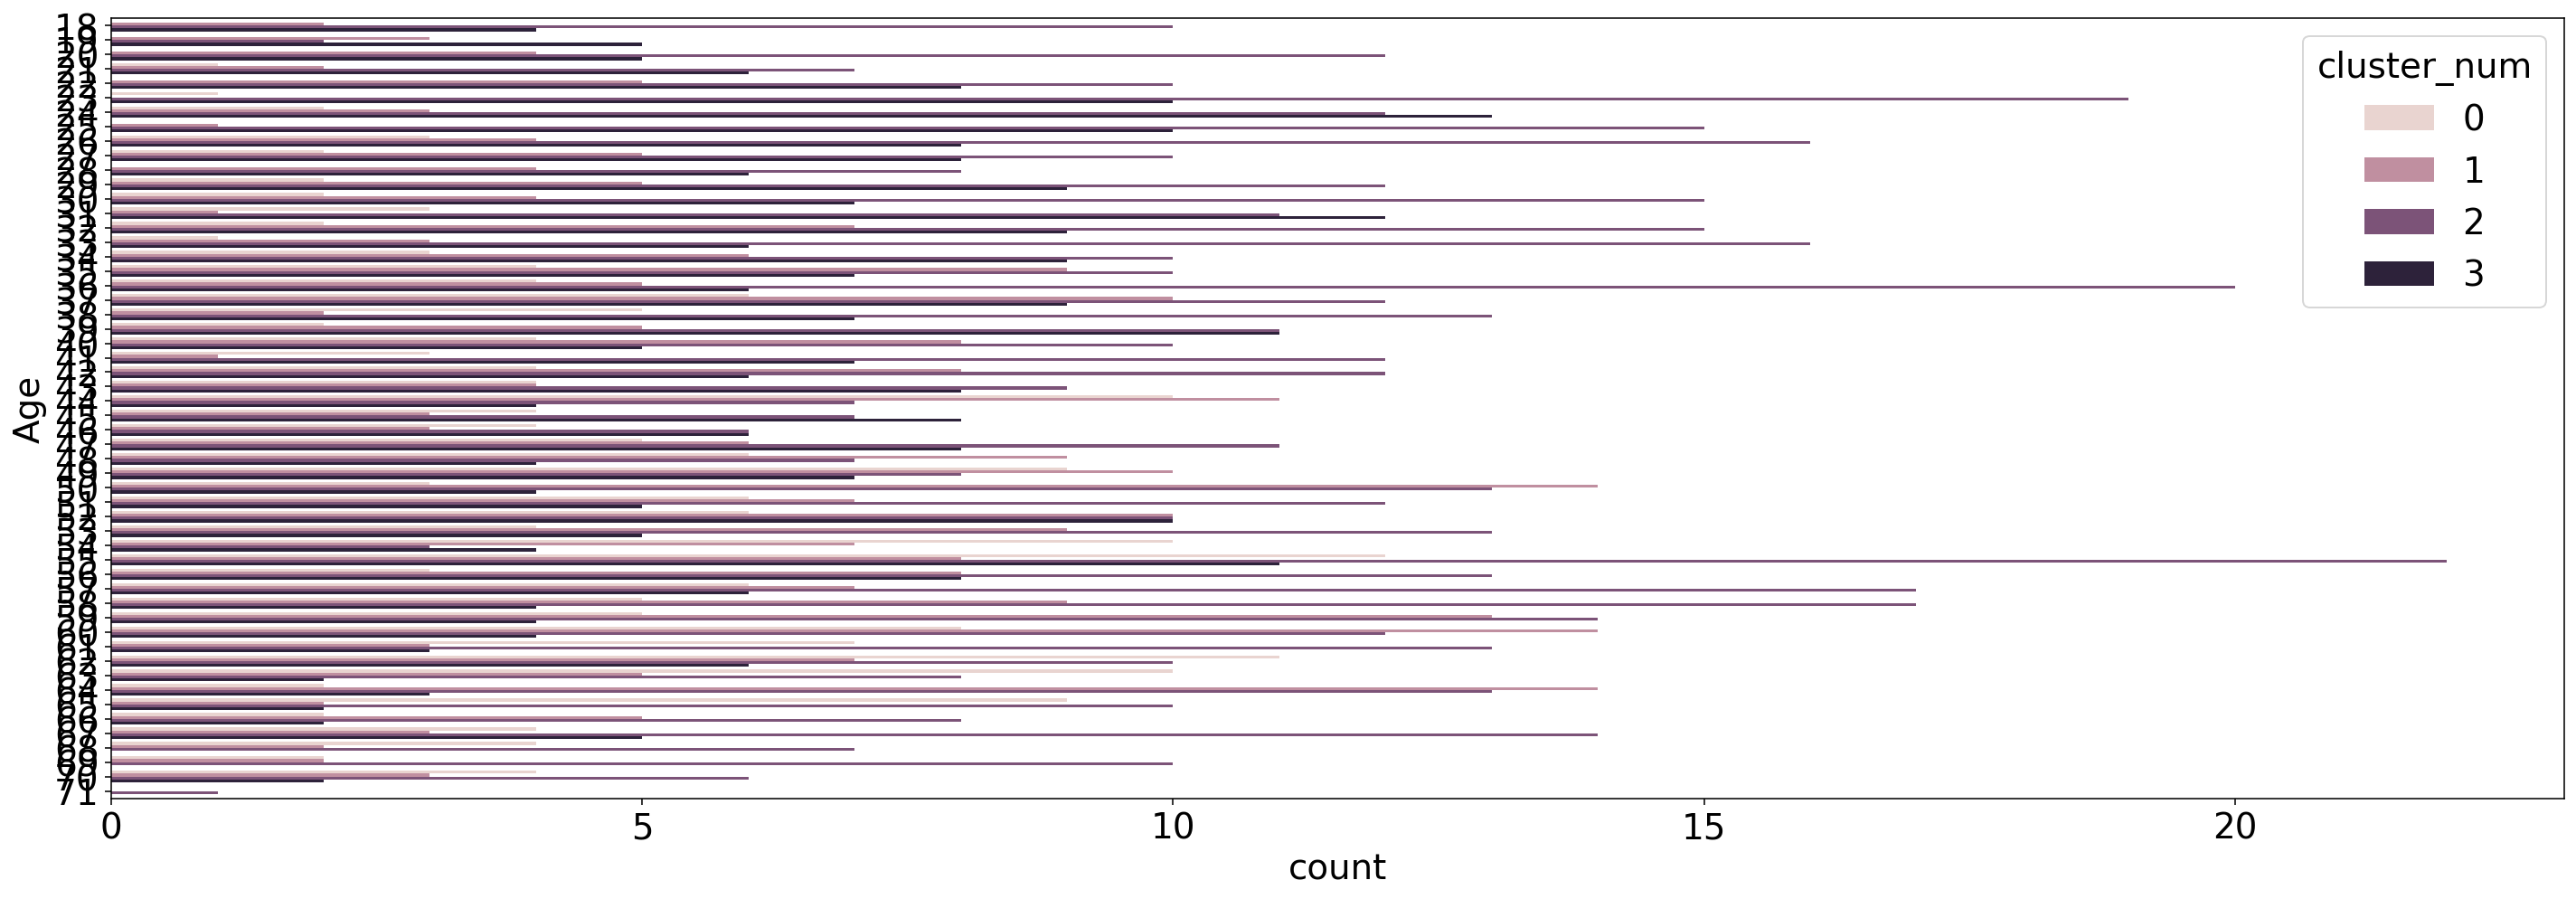

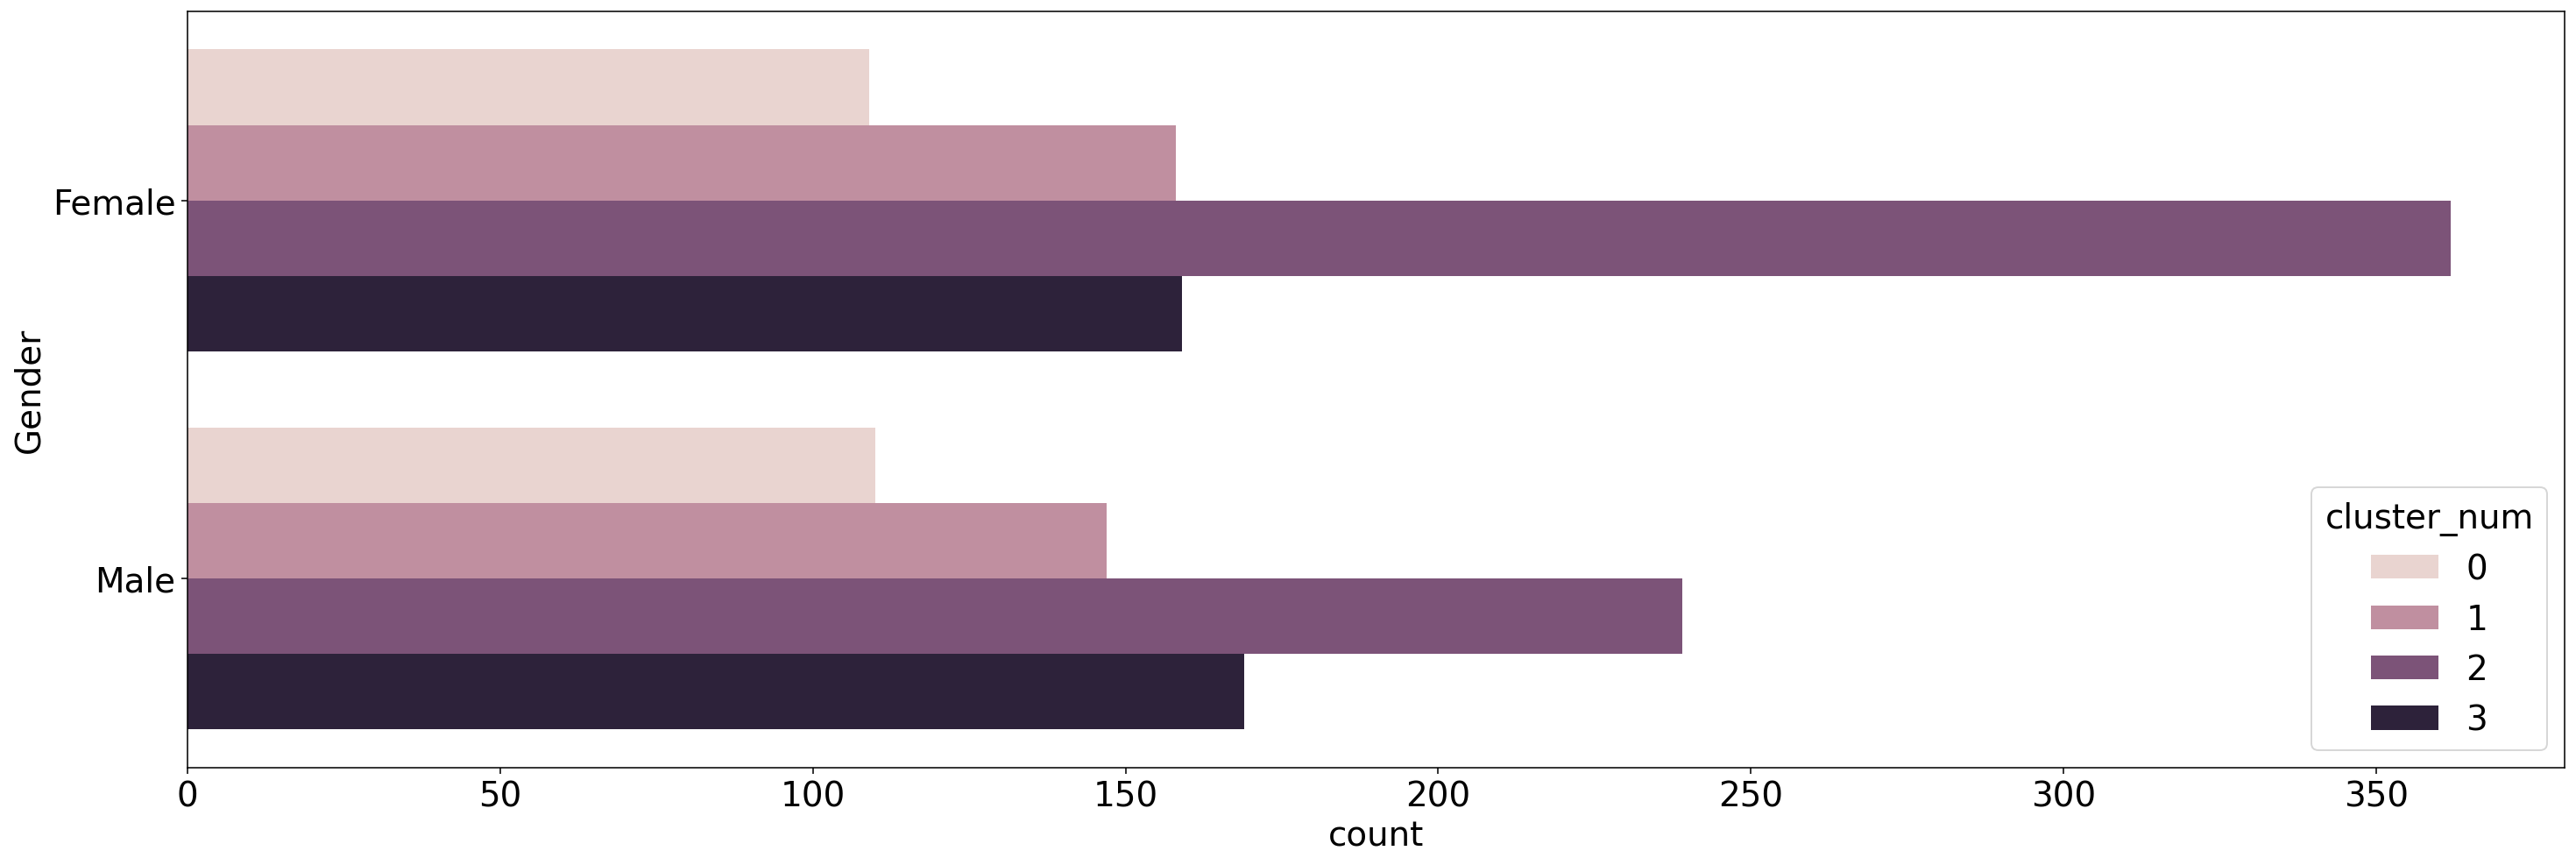

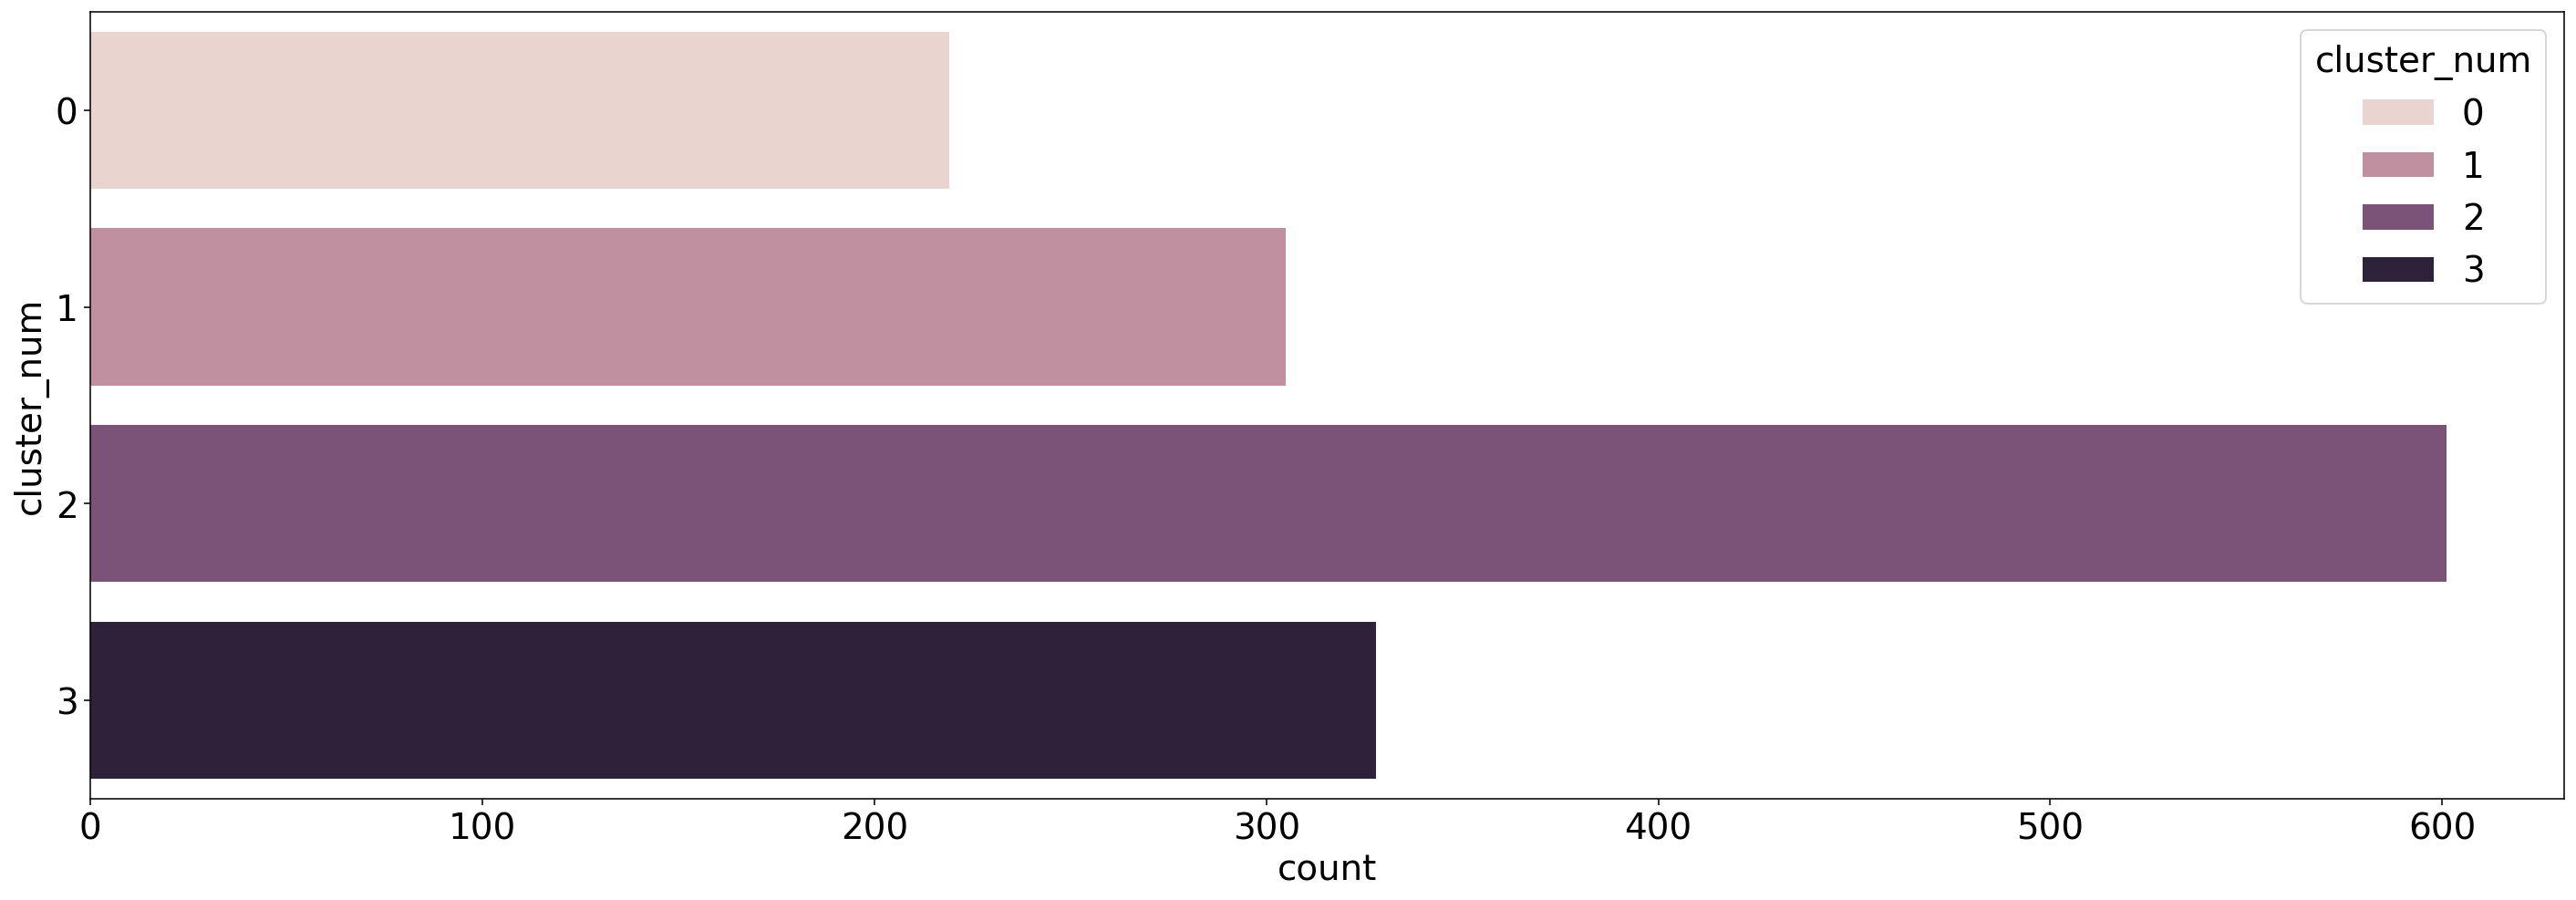

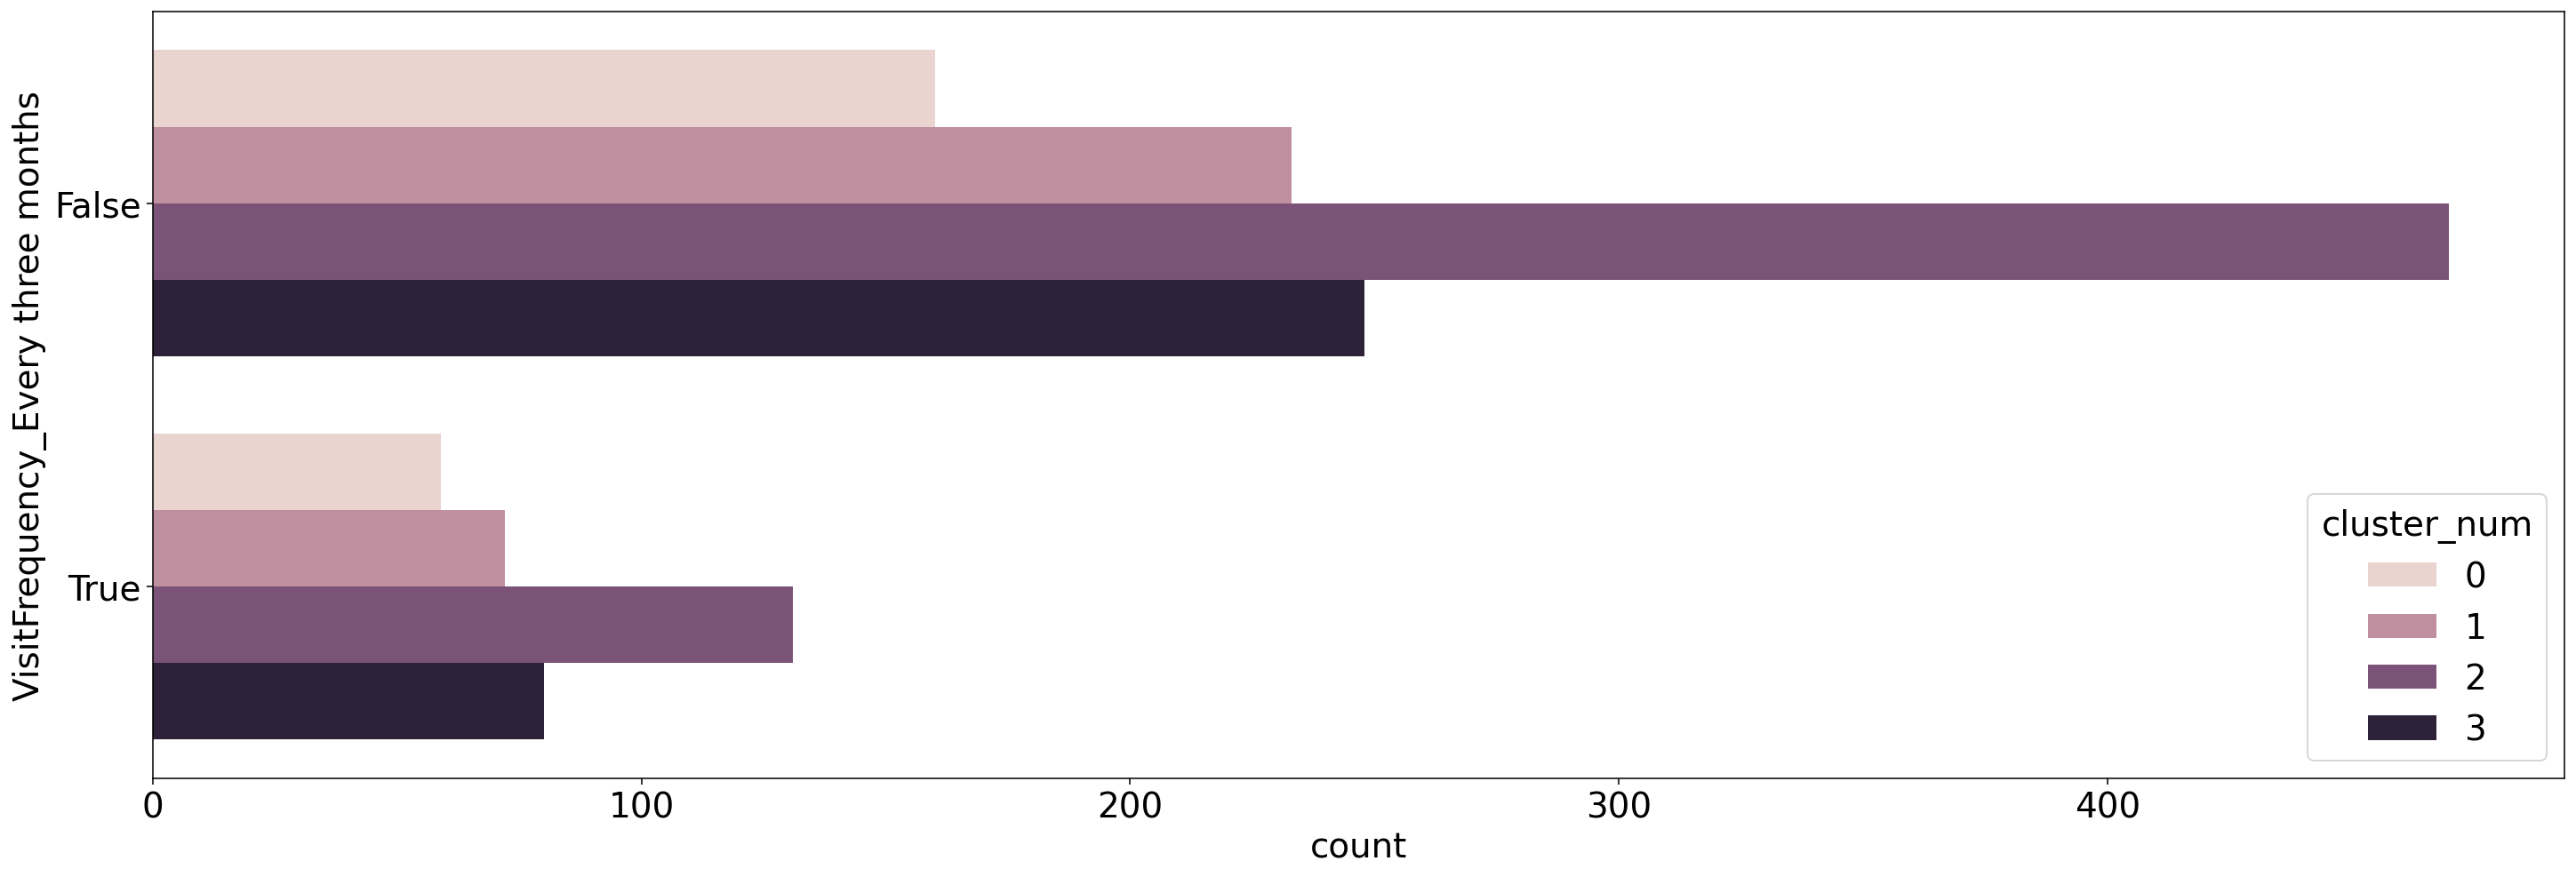

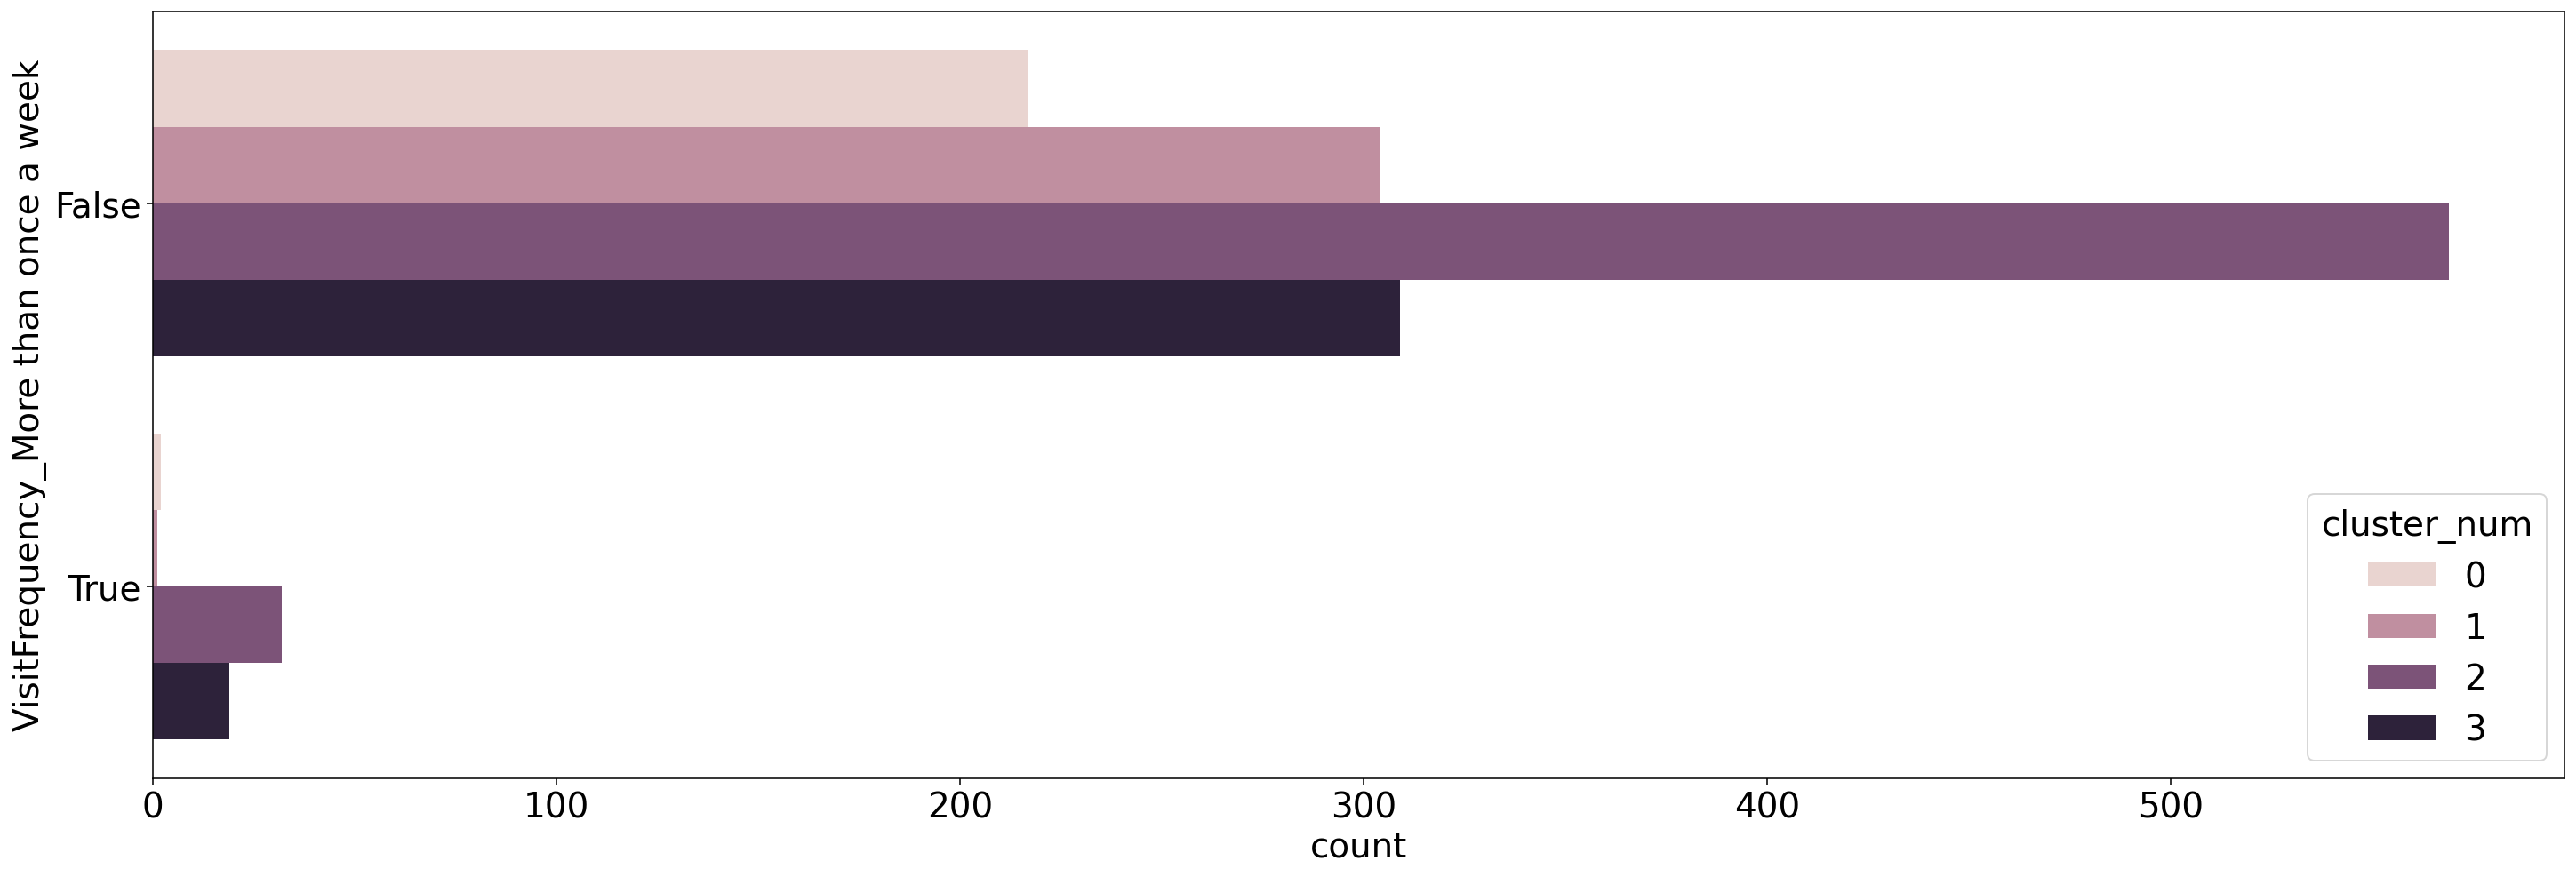

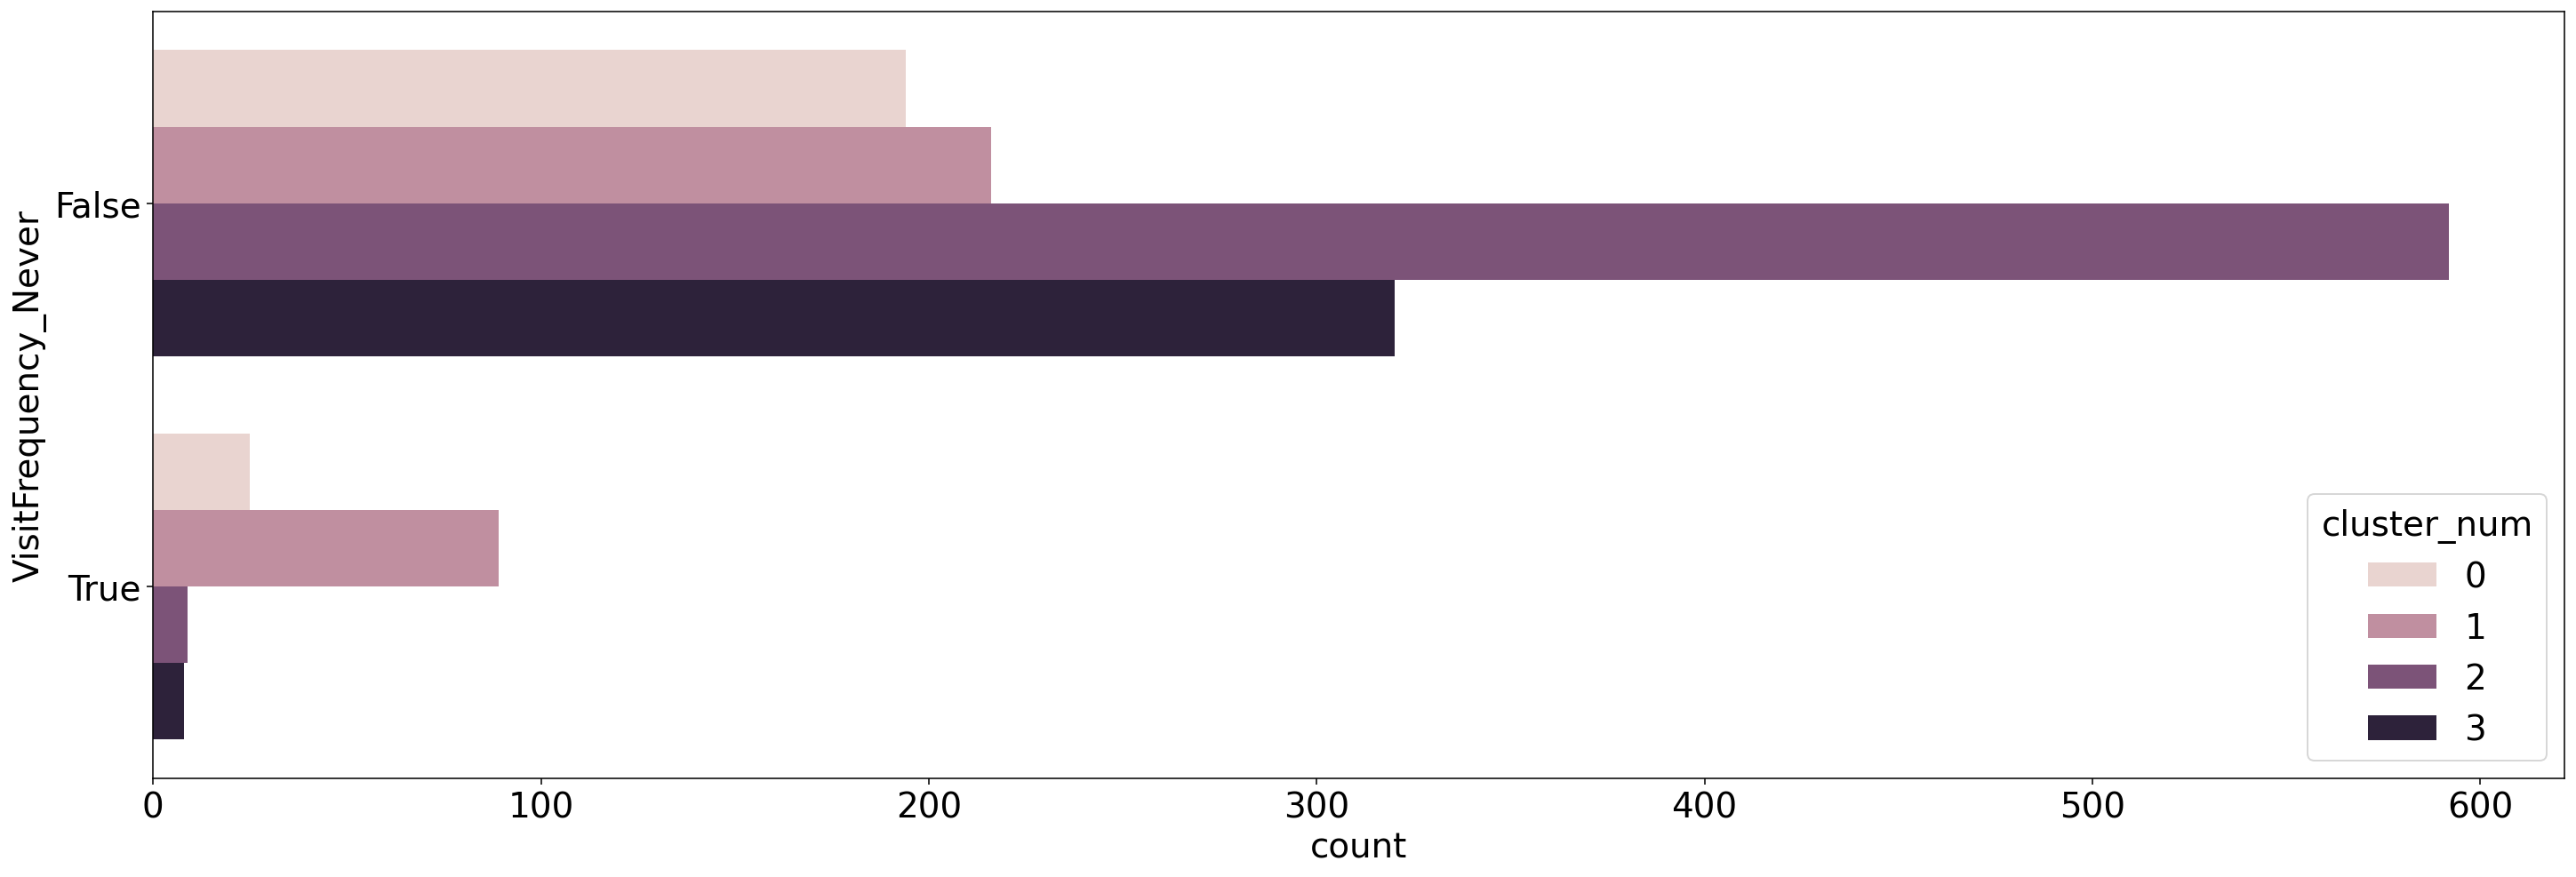

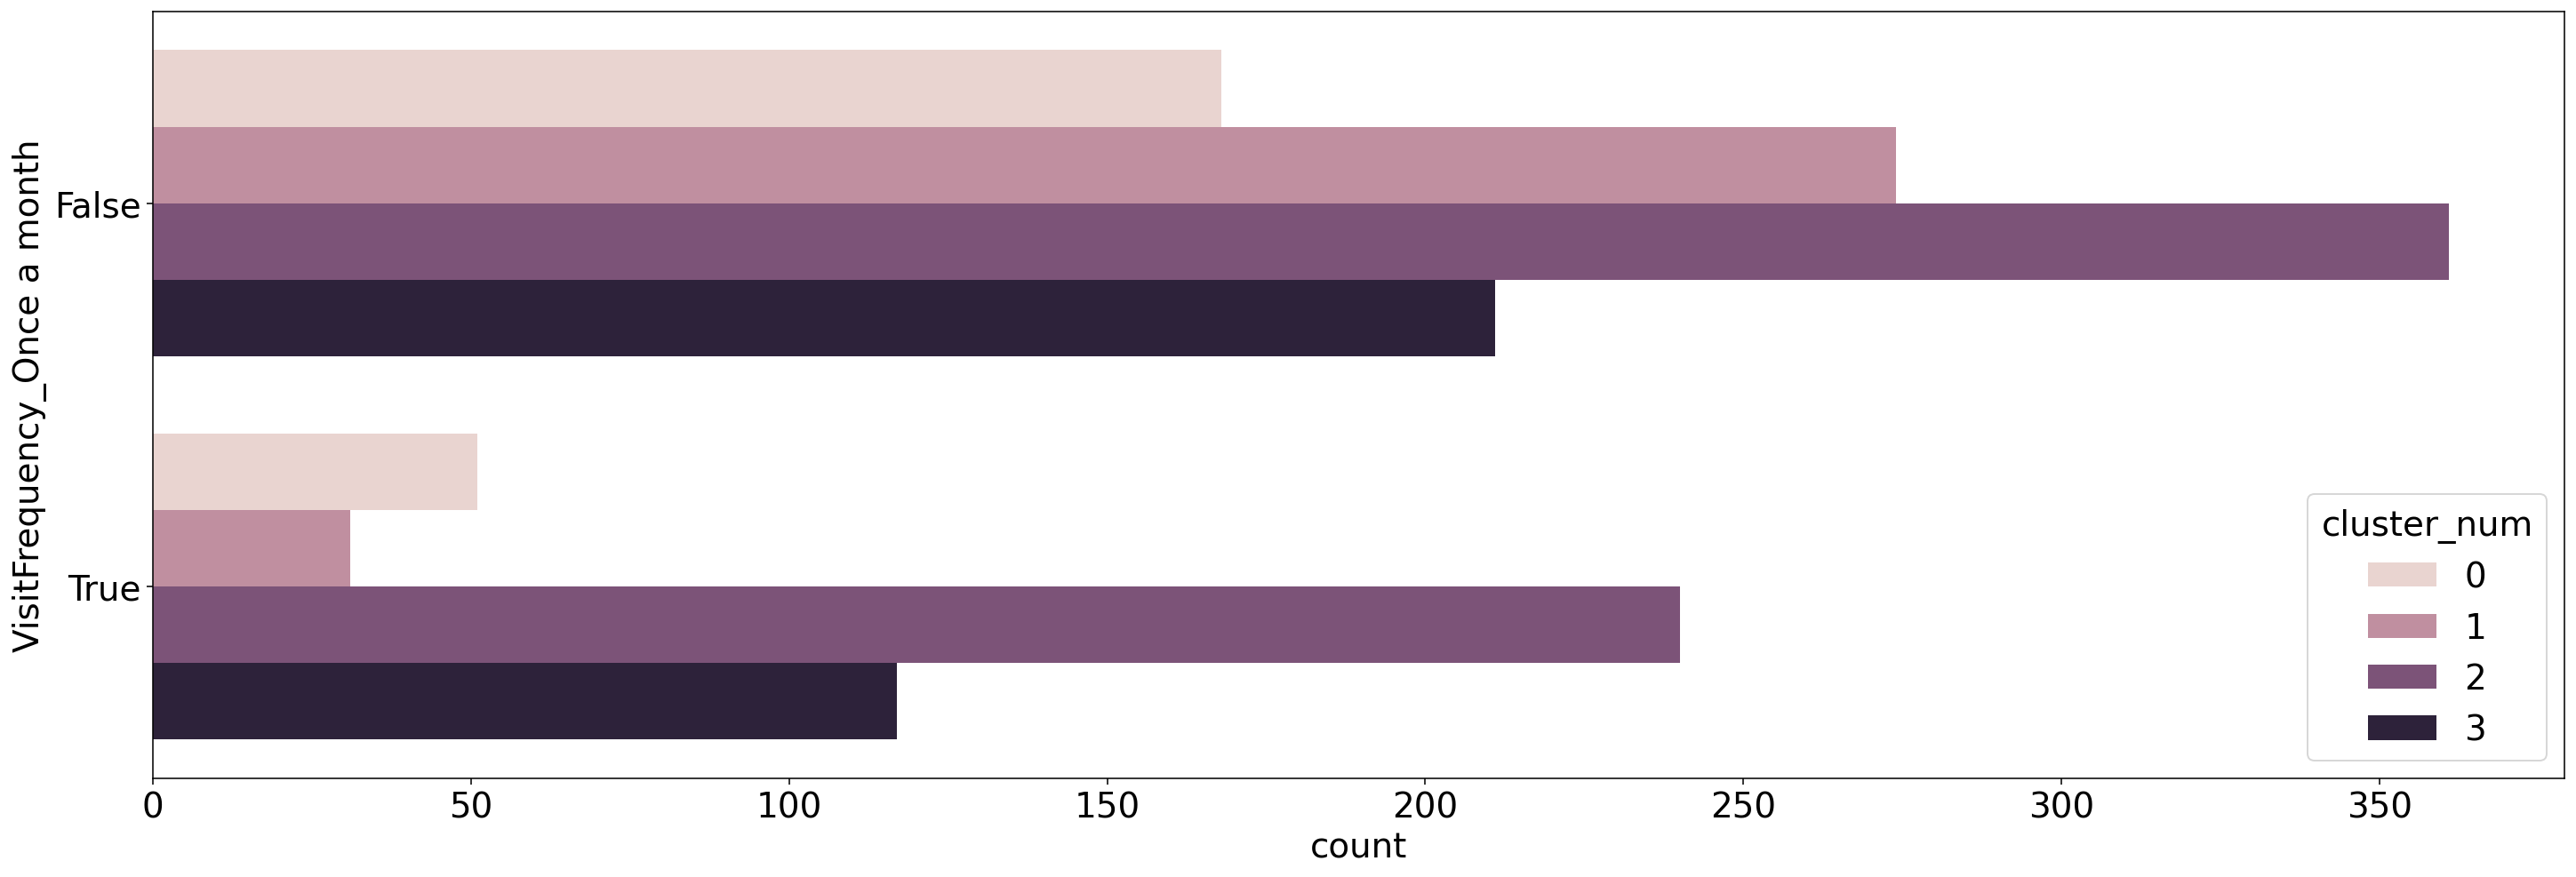

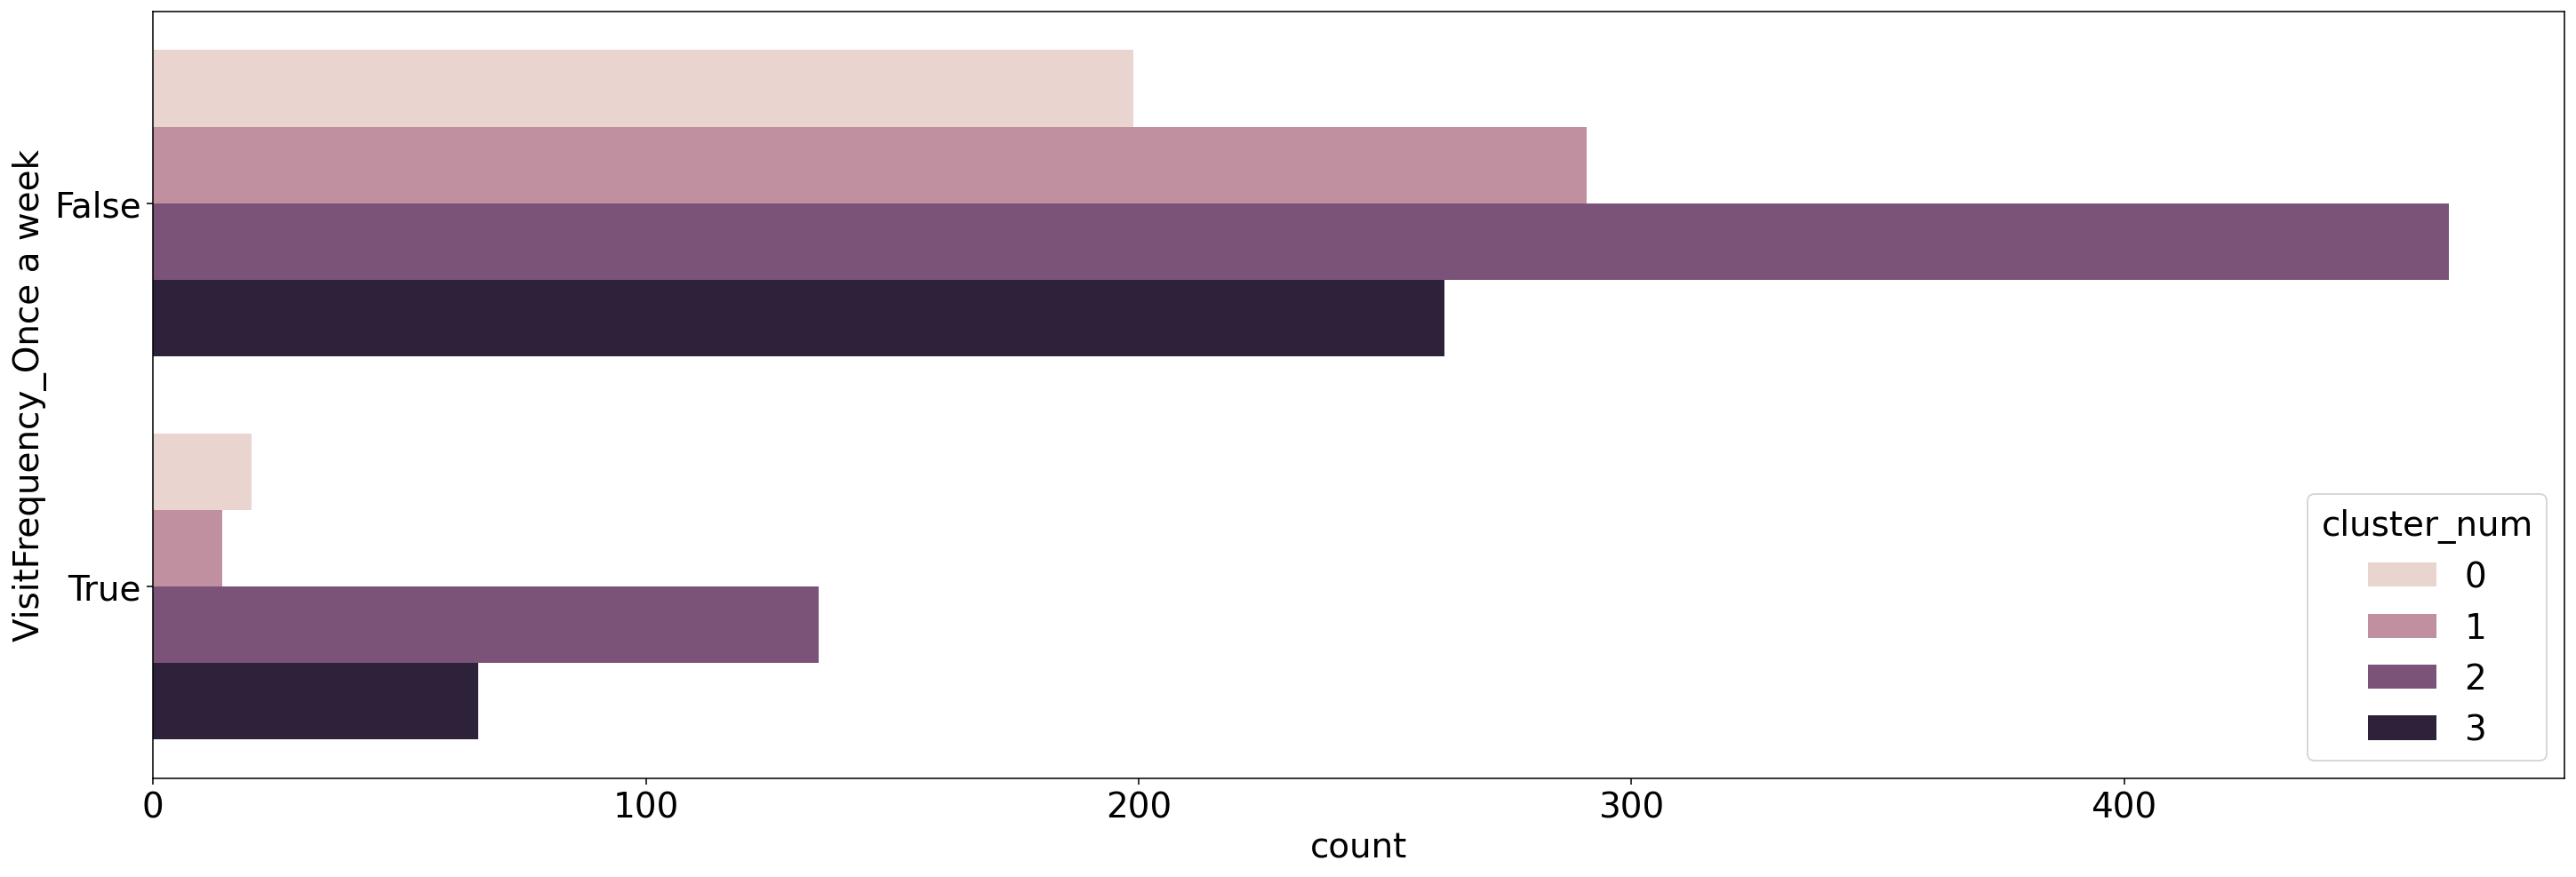

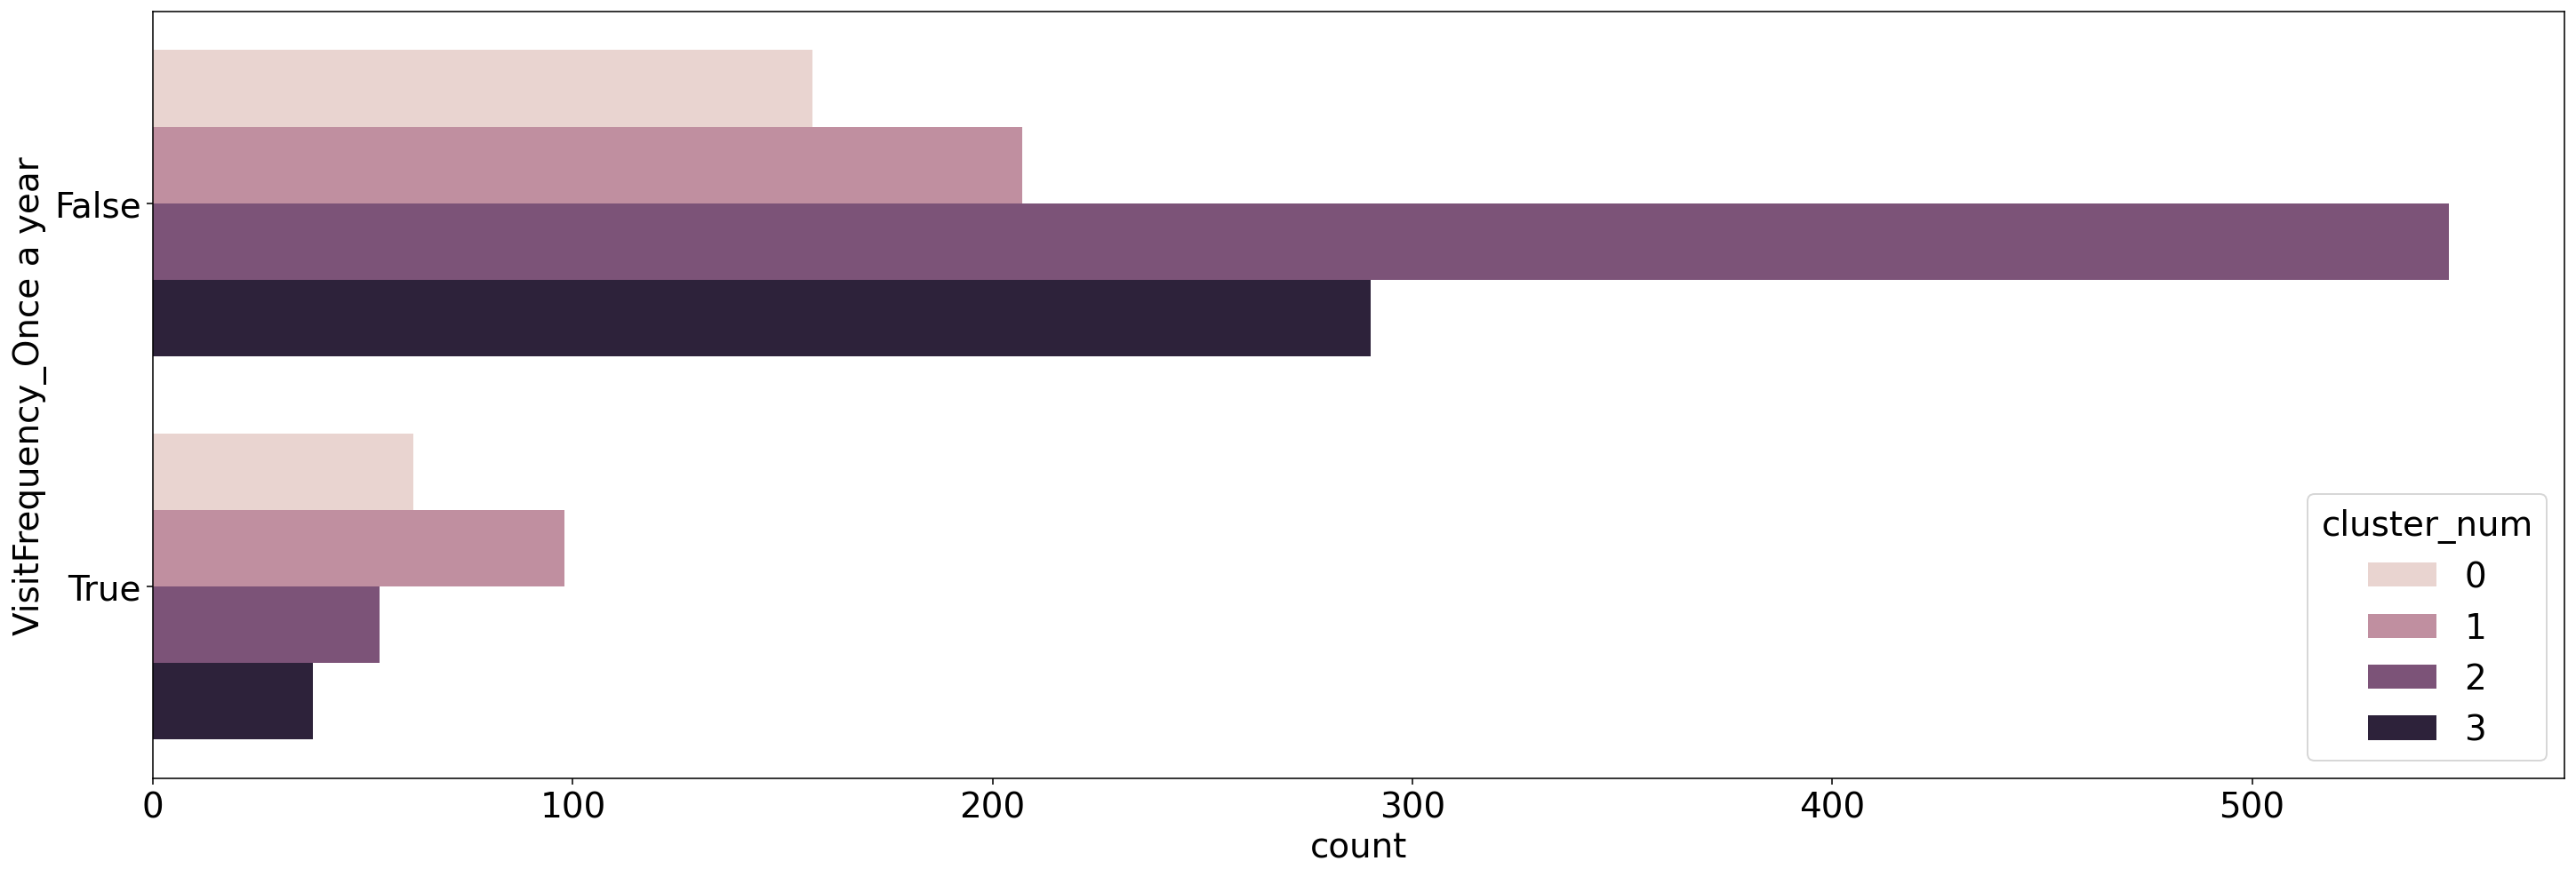

In [31]:
for i in dataset1.columns:
    sns.countplot(y=dataset1[i], hue=dataset1['cluster_num'], data=dataset1)
#     plt.rcParams['figure.figsize'] = (25, 8)
    plt.rcParams['figure.dpi'] = 140
    plt.rcParams['font.size'] = 20
    plt.show()

# for i in ['cluster_num_0', 'cluster_num_1', 'cluster_num_2', 'cluster_num_3']:
#     for j in cols:
#         sns.countplot(x=dataset1[i], hue=dataset1[j])
#         plt.show()

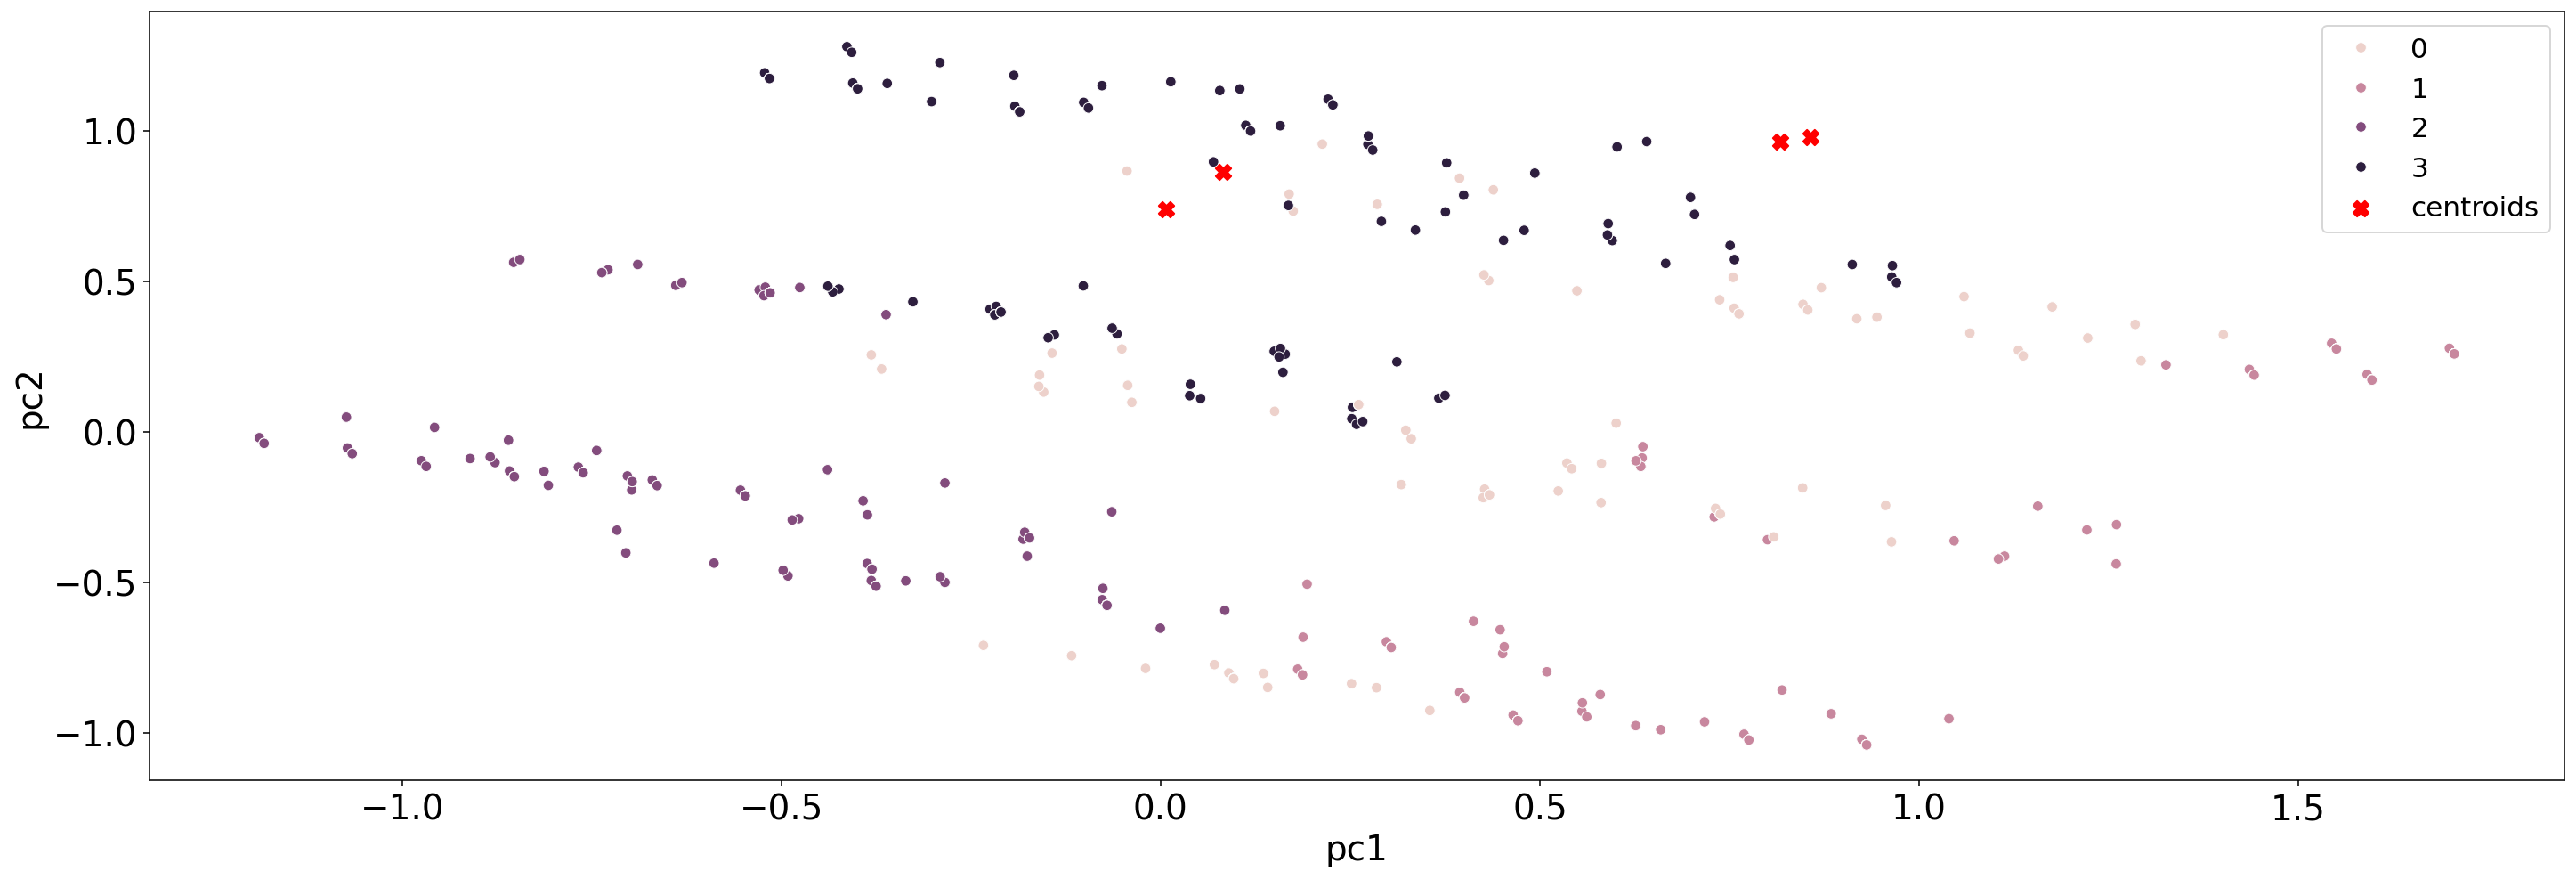

In [32]:
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.size'] = 16
plt.legend()
plt.show()

In [33]:
dataset["cluster_num"]

0       0
1       3
2       3
3       2
4       1
       ..
1448    1
1449    2
1450    3
1451    2
1452    1
Name: cluster_num, Length: 1453, dtype: int32

In [35]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
crosstab =pd.crosstab(dataset['cluster_num'],dataset['Like'])
#Reordering cols
#crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab

Like,-5,-4,-3,-2,-1,0,1,2,3,4,5
cluster_num,,,,,,,,,,,
0,33,18,22,13,17,45,24,21,20,4,2
1,106,44,37,28,16,35,18,18,3,0,0
2,4,5,5,9,17,50,70,92,139,111,99
3,9,4,9,9,8,39,40,56,67,45,42


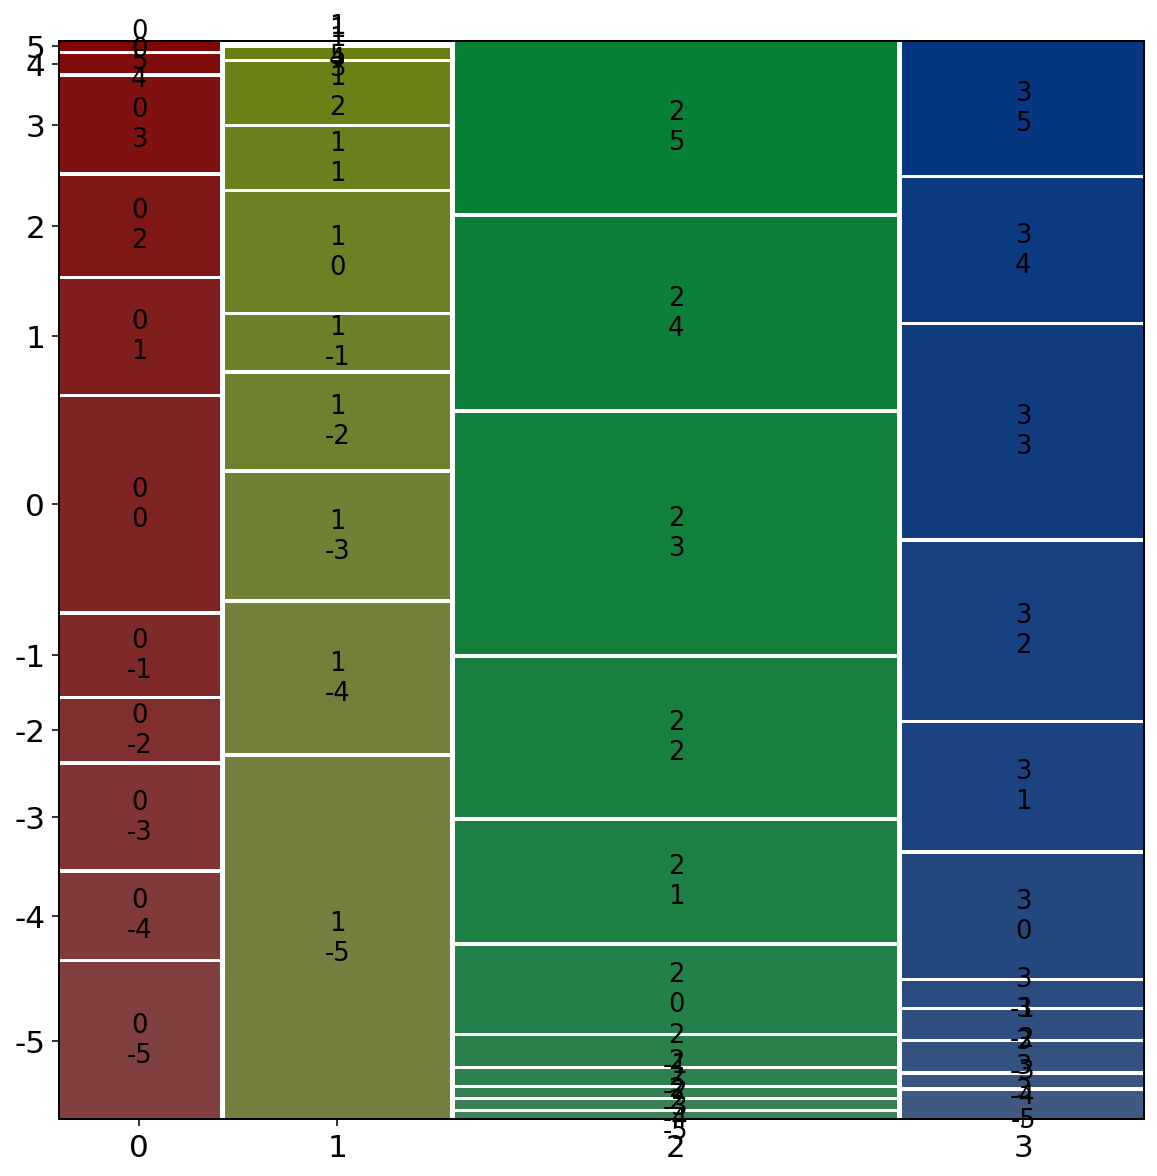

In [36]:
mosaic(crosstab.stack())
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['font.size'] = 5
plt.show()

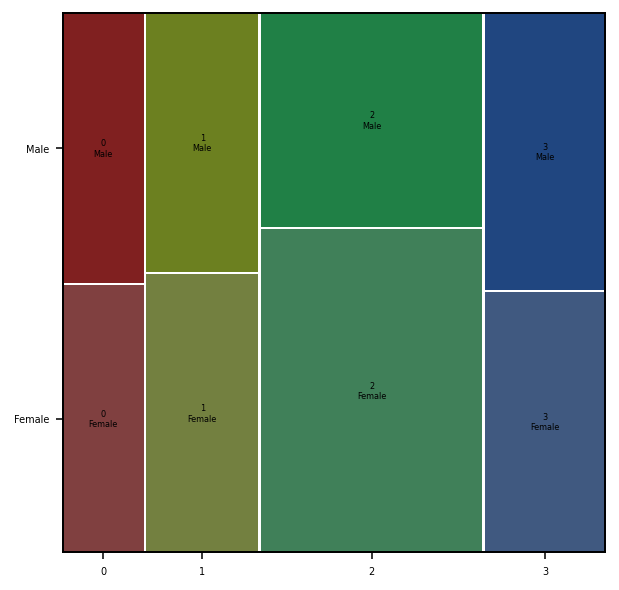

In [37]:
crosstab =pd.crosstab(dataset['cluster_num'],dataset['Gender'])
#Reordering cols
crosstab = crosstab[['Female', 'Male']]
mosaic(crosstab.stack())
plt.show()

<Axes: xlabel='cluster_num', ylabel='Age'>

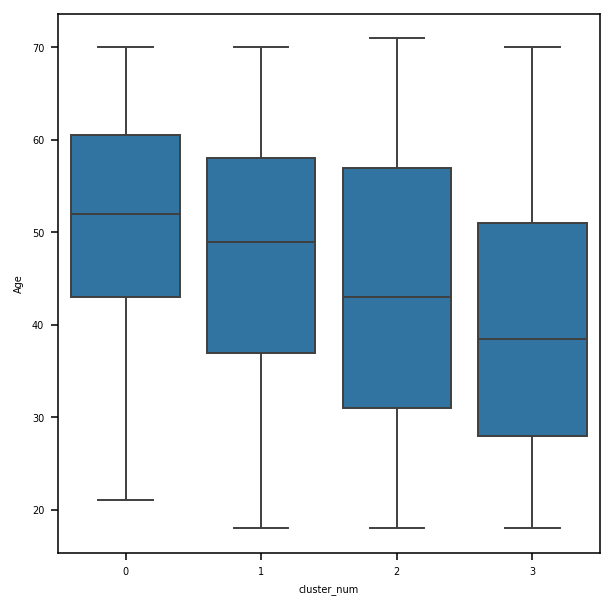

In [38]:
sns.boxplot(x='cluster_num', y='Age', data=dataset1)

In [39]:
dataset

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,Female,3
2,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,Female,3
3,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,Female,2
4,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,Male,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male,1
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,Once a week,Female,2
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,Once a month,Female,3
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,Every three months,Male,2


In [48]:
train_dataset = dataset.drop(columns=['cluster_num', 'VisitFrequency', 'Gender'])
train_dataset

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age
0,0,1,0,1,0,1,1,0,1,0,0,-3,61
1,1,1,0,1,1,1,1,1,1,0,0,2,51
2,0,1,1,1,1,1,0,1,1,1,0,1,62
3,1,1,0,1,1,1,1,1,0,0,1,4,69
4,0,1,0,1,1,1,1,0,0,1,0,2,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47
1449,1,1,0,1,0,0,1,1,0,1,0,2,36
1450,1,1,0,1,0,1,0,1,1,0,0,3,52
1451,1,1,0,0,0,1,1,1,0,1,0,4,41


In [90]:
test_dataset = dataset['cluster_num']
test_dataset

0       0
1       3
2       3
3       2
4       1
       ..
1448    1
1449    2
1450    3
1451    2
1452    1
Name: cluster_num, Length: 1453, dtype: int32

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_dataset, test_dataset, test_size=0.3,random_state=42)

In [101]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [102]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9839449541284404


In [94]:
conf = metrics.confusion_matrix(y_test, y_pred)
conf

array([[ 63,   1,   0,   1],
       [  1, 101,   0,   0],
       [  0,   1, 168,   0],
       [  2,   0,   1,  97]])

In [95]:
metrics.precision_score(y_test, y_pred, average='weighted')
metrics.recall_score(y_test, y_pred, average='weighted')

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        65
           1       0.98      0.99      0.99       102
           2       0.99      0.99      0.99       169
           3       0.99      0.97      0.98       100

    accuracy                           0.98       436
   macro avg       0.98      0.98      0.98       436
weighted avg       0.98      0.98      0.98       436



Text(0.5, 1.0, 'Accuracy Score: 0.9839449541284404')

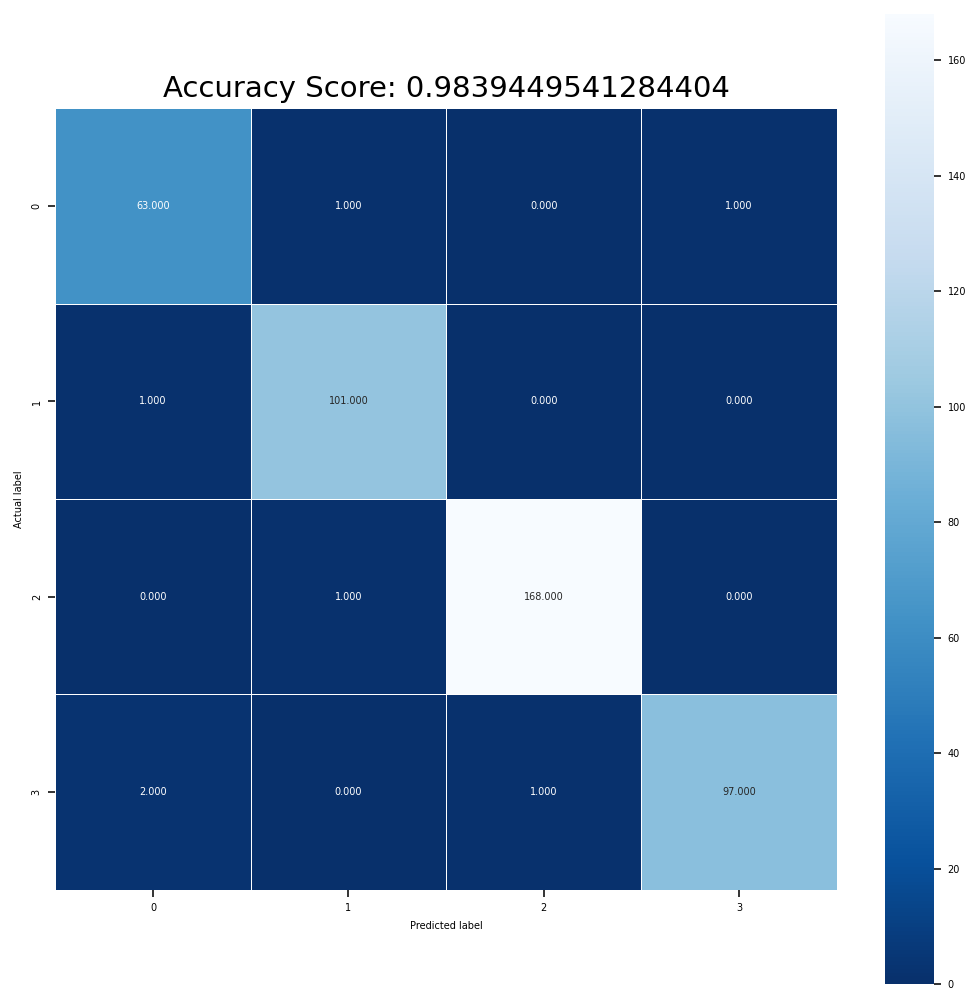

In [96]:
plt.figure(figsize=(9,9))
sns.heatmap(conf, annot=True, fmt=".3f", linewidths=.5, square = True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15)

Text(0, 0.5, 'Predicted label')

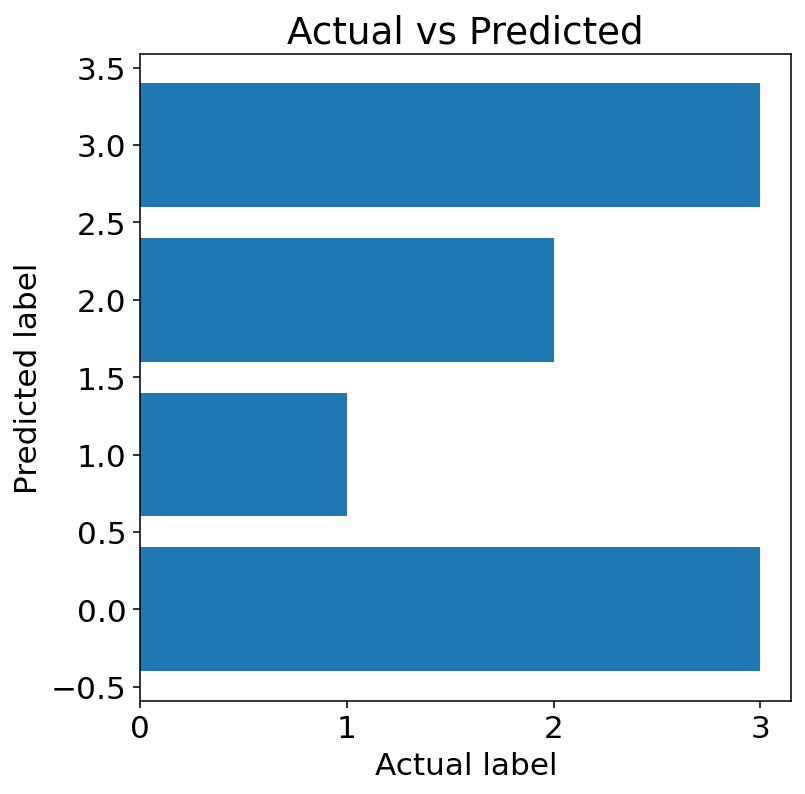

In [125]:
plt.figure(figsize=(6,6))
plt.barh(y_test, y_pred)
plt.title("Actual vs Predicted")
plt.xlabel('Actual label')
plt.ylabel('Predicted label')